In [387]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [388]:
import FinanceDataReader as fdr
df_=fdr.DataReader('SPY','2014-9-1','2019-1-1').iloc[:,:5]

https://github.com/bukosabino/ta

https://technical-analysis-library-in-python.readthedocs.io/en/latest/

https://school.stockcharts.com/doku.php

https://www.investopedia.com/

In [389]:
import ta

In [390]:
def plot(series,figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.plot(series)
    plt.title(series.name)
    plt.show()
    
def corrmat(a,b, name1,name2):
    return pd.DataFrame({name1:a,name2:b}).dropna().corr()

def sma(series, window):
    return series.rolling(window).mean()

def plot_with_close(series):
    fig, ax1 = plt.subplots(figsize=(7,5))

    ax2 = ax1.twinx()
    ax1.plot(series,color='r')
    ax2.plot(close,c='black')
    ax1.set_ylabel(series.name ,c='r')
    ax2.set_ylabel('Close',c='black')
    plt.title('{} vs Close'.format(series.name))
    plt.show()

In finance, technical analysis is an analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume. Behavioral economics and quantitative analysis use many of the same tools of technical analysis, which, being an aspect of active management, stands in contradiction to much of modern portfolio theory. The efficacy of both technical and fundamental analysis is disputed by the efficient-market hypothesis, which states that stock market prices are essentially unpredictable, and research on whether technical analysis offers any benefit has produced mixed results.

https://en.wikipedia.org/wiki/Technical_analysis

bukosabino's *ta* 42 indicators

Volume

- Money Flow Index (MFI)
- Accumulation/Distribution Index (ADI)
- On-Balance Volume (OBV)
- Chaikin Money Flow (CMF)
- Force Index (FI)
- Ease of Movement (EoM, EMV)
- Volume-price Trend (VPT)
- Negative Volume Index (NVI)
- Volume Weighted Average Price (VWAP)

Volatility

- Average True Range (ATR)
- Bollinger Bands (BB)
- Keltner Channel (KC)
- Donchian Channel (DC)
- Ulcer Index (UI)


Trend

- Simple Moving Average (SMA)
- Exponential Moving Average (EMA)
- Weighted Moving Average (WMA)
- Moving Average Convergence Divergence (MACD)
- Average Directional Movement Index (ADX)
- Vortex Indicator (VI)
- Trix (TRIX)
- Mass Index (MI)
- Commodity Channel Index (CCI)
- Detrended Price Oscillator (DPO)
- KST Oscillator (KST)
- Ichimoku Kinkō Hyō (Ichimoku)
- Parabolic Stop And Reverse (Parabolic SAR)
- Schaff Trend Cycle (STC)


Momentum
- Relative Strength Index (RSI)
- Stochastic RSI (SRSI)
- True strength index (TSI)
- Ultimate Oscillator (UO)
- Stochastic Oscillator (SR)
- Williams %R (WR)
- Awesome Oscillator (AO)
- Kaufman's Adaptive Moving Average (KAMA)
- Rate of Change (ROC)
- Percentage Price Oscillator (PPO)
- Percentage Volume Oscillator (PVO)


Others
- Daily Return (DR)
- Daily Log Return (DLR)
- Cumulative Return (CR)

In [391]:
close = df_.Close
low = df_.Low
open = df_.Open
high = df_.High
volume = df_.Volume
ret = close.pct_change().dropna().rename('ret')
sma_ret = close.rolling(14).mean().pct_change().dropna().rename('sma_ret')
mom = close.diff().dropna().rename('momentum')
mom_volume = volume.diff().dropna().rename('volume_momentum')

In [392]:
allta = ta.add_all_ta_features(df_,'Open','High','Low','Close','Volume')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [393]:
names = allta.columns
len(names)

88

In [394]:
ohlcv = names[0:5]
volumes = names[5:15]
volatility = names[15:36]
trend = names[36:70]
momentum = names[70:85]
others = names[85:]

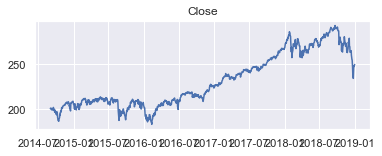

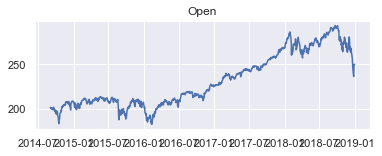

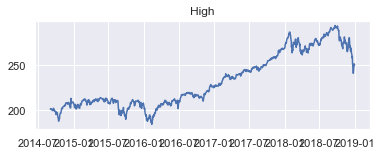

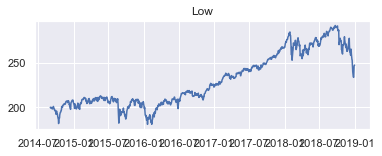

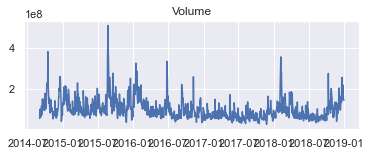

In [395]:
for i in ohlcv:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

머신러닝 모델의 피쳐로써 사용 될 기술적 지표에 대해 알아보자. 이 때 어떤 라벨(y)이냐에 따라 피쳐를 선택할 수 있을 것이다.

나는 Y가 meta-label일 때 적절한 X가 무엇이어야 할지 살펴볼 것이다.

Y는 meta-label (AFML by De Prado에서 제시됨) 즉 첫번째 모델의 성공여부이다.

사전적으로 정해 놓은 z라는 목표 익절 수익률 혹은 목표 손절 손실율이 있다고 하자.

이때 첫번째 모델의 bet이 성공했다는 것 (1)은 정해진 기간안에 z라는 목표수익률을 달성한 것이며, 반대로 bet이 실패했다는 것(0)은 그 bet이 목표손실율에 먼저 도달한 것을 의미한다.

따라서 X는 주어진 기간안에 가격이 정해진 목표 손익률 중 손실에 먼저 닿을지, 이익에 먼저 닿을지를 예측하는데 필요한 데이터여야 한다.

조금 더 간단히 생각한다면, 가격이 앞으로 오를지 내릴지를 예측하는 것인데, 트리플배리어 설정의 파라미터에 따라 어느시간 동안 얼마나 오르내릴지가 달라진다.

예를 들어 목표 손익률이 모두 5퍼센트이고, 최대 보유 기간을 6개월이라고 하자. 그렇다면 y는 한 시점에서의 베팅이 6개월 안에 5퍼센트의 수익 달성을 먼저할지, 5퍼센트의 손실발생을 먼저할지를 나타내는 라벨이다.

또한 첫번째 모델이 모멘텀전략을 사용했다고 하자. 그렇다면 올라가는 추세에 매수포지션을, 내려가는 추세에는 매도포지션을 취한다.

이때 y가 -1일 때는 주로 트렌드가 변하는 전환점이 된다. (이 때 트렌드 전환의 대강의 기간은 첫번째 전략에서 쓰인 파라미터에 의존한다. 예를 들어 RSI를 사용한다면 window가 그것을 판가름 할 것이다.) 왜냐하면 모멘텀전략은 갑자기 바뀌는 가격추세를 감지하지 못하기 때문이다.

나는 우선 과거 가격과 거래량에서 이에 필요한 정보를 추출하고자 한다.

# Volume

In [396]:
df_volumes = allta[volumes].join([ret,sma_ret,close])

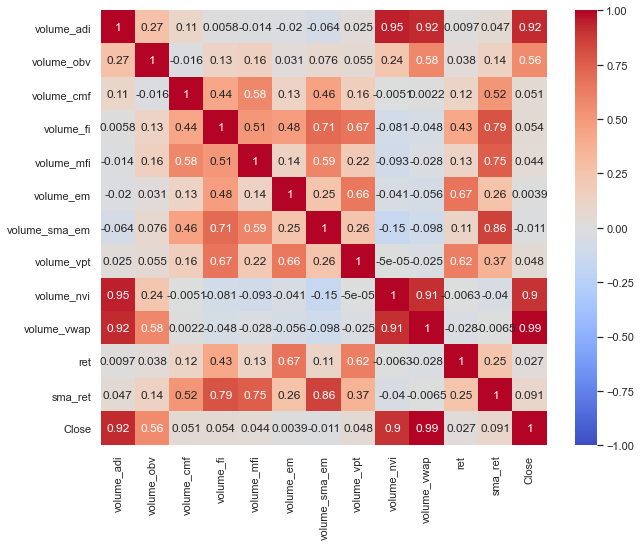

In [397]:
plt.figure(figsize=(10,8))
sns.heatmap(df_volumes.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

In [398]:
# Highly correlated market features
corr = df_volumes.corr()
h = 0.75
where = (abs(corr)>h) & (corr<1)

hc_list =[]
for i in range(len(np.where(where)[0])):
    hc_list.append(sorted([corr.columns[np.where(where)[0][i]], corr.columns[np.where(where)[1][i]]]))
hc_list = np.array(sorted(hc_list))[::2,:]
print('Pairs of above-{}-correlated features : \n '.format(h) , hc_list)

Pairs of above-0.75-correlated features : 
  [['Close' 'volume_adi']
 ['Close' 'volume_nvi']
 ['Close' 'volume_vwap']
 ['sma_ret' 'volume_fi']
 ['sma_ret' 'volume_mfi']
 ['sma_ret' 'volume_sma_em']
 ['volume_adi' 'volume_nvi']
 ['volume_adi' 'volume_vwap']
 ['volume_nvi' 'volume_vwap']]


## Accumulation/Distribution Index (ADI)
1. Money Flow Multiplier = [(Close  -  Low) - (High - Close)] /(High - Low) 

2. Money Flow Volume = Money Flow Multiplier x Volume for the Period

3. ADL(ADI) = Previous ADL + Current Period's Money Flow Volume


- Accumulation Distribution Line is a volume-based indicator designed to measure the cumulative flow of money into and out of a security. 
- As with cumulative indicators, the ADL is a running total of each period's Money Flow Volume. 
- Chartists can use this indicator to affirm a security's underlying trend or anticipate reversals when the indicator diverges from the security price.

- The A/D line is used to help assess price trends and potentially spot forthcoming reversals. 
- If a security’s price is in a downtrend while the A/D line is in an uptrend, then the indicator shows there may be buying pressure and the security’s price may reverse to the upside. Conversely, if a security’s price is in an uptrend while the A/D line is in a downtrend, then the indicator shows there may be selling pressure, or higher distribution. This warns that the price may be due for a decline.

In [399]:
money_flow_mult = ((close - low) - (high - close)) /(high - low)
money_flow_mult = money_flow_mult.rename('Money Flow Multiplier')
money_flow_volume = money_flow_mult * volume
money_flow_volume = money_flow_volume.rename('Money Flow Volume')

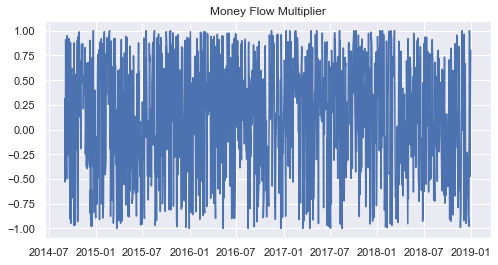

In [400]:
plot(money_flow_mult)

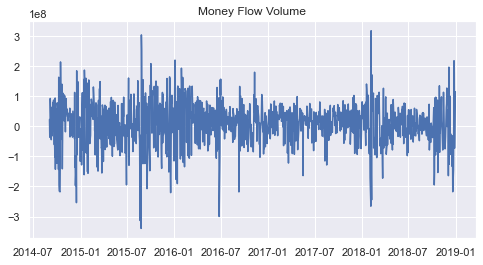

In [401]:
plot(money_flow_volume)

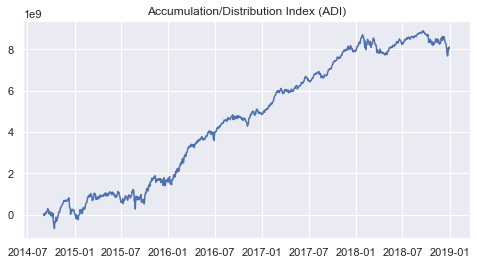

In [402]:
adi = money_flow_volume.cumsum()
adi = adi.rename('Accumulation/Distribution Index (ADI)')
plot(adi)

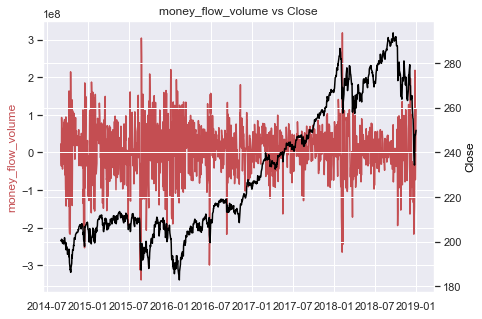

In [403]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(money_flow_volume,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('money_flow_volume',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('money_flow_volume vs Close')
plt.show()

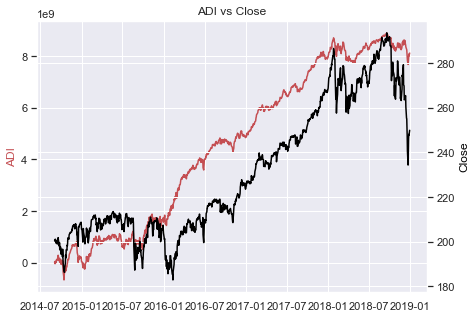

In [404]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(adi,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('ADI',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('ADI vs Close')
plt.show()

**MONEY FLOW VOLUME selected (money_flow_volume)**

## Chaikin Money Flow (CMF)

1. Money Flow Multiplier = [(Close  -  Low) - (High - Close)] /(High - Low) 

2. Money Flow Volume = Money Flow Multiplier x Volume for the Period

3. 20-period CMF = 20-period Sum of Money Flow Volume / 20 period Sum of Volume 


- Chaikin Money Flow sums Money Flow Volume for a specific look-back period, typically 20 or 21 days. 
- The resulting indicator fluctuates above/below the zero line just like an oscillator. 
- Chartists weigh the balance of buying or selling pressure with the absolute level of Chaikin Money Flow. Additionally, chartists can look for crosses above or below the zero line to identify changes on money flow.

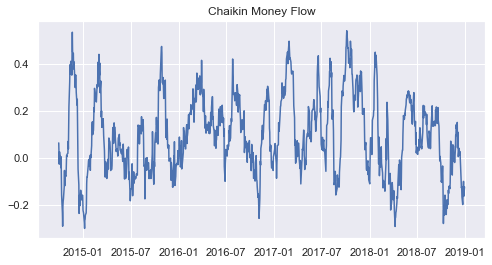

In [405]:
cmf = money_flow_volume.rolling(20).sum() / volume.rolling(20).sum()
cmf = cmf.rename('Chaikin Money Flow')
plot(cmf)

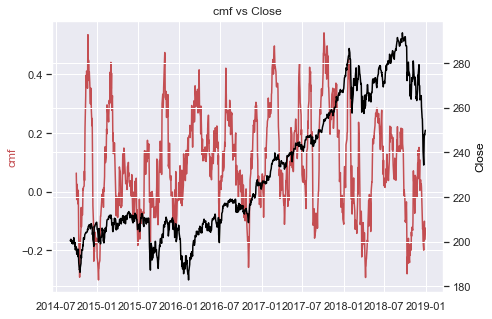

In [406]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(cmf,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('cmf',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('cmf vs Close')
plt.show()

In [407]:
corrmat(cmf,adi,'cmf','adi')

cmf       adi
cmf  1.000000  0.107925
adi  0.107925  1.000000



they have trend.
So, we can log diff them, or simply use Money flow volume instead.


## Ease of movement (EoM, EMV)

Distance Moved = ((H + L)/2 - (Prior H + Prior L)/2) 

Box Ratio = ((V/100,000,000(scale)/(H - L))

1-Period EMV = ((H + L)/2 - (Prior H + Prior L)/2) / ((V/100,000,000)/(H - L))

1-Period EMV = Distance Moved / Box Ratio

14-Period Ease of Movement = 14-Period simple moving average of 1-period EMV


- Ease of Movement (EMV) is a volume-based oscillator that fluctuates above and below the zero line. 
- As its name implies, it is designed to measure the “ease” of price movement.
- In general, prices are advancing with relative ease when the oscillator is in positive territory. Conversely, prices are declining with relative ease when the oscillator is in negative territory.

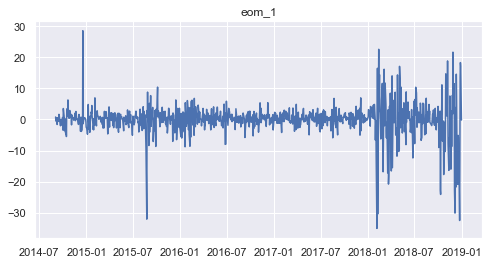

In [408]:
eom = ta.volume.ease_of_movement(high,low,volume,1)
plot(eom)

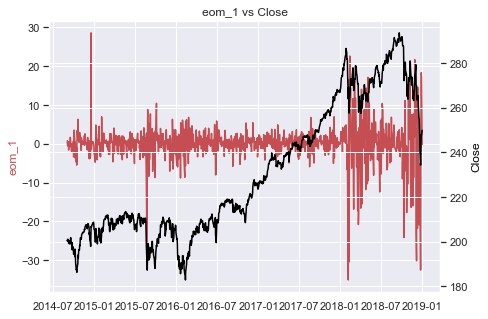

In [409]:
plot_with_close(eom)

In [410]:
corrmat(eom, close.pct_change(),'eom_1','ret1')

eom_1      ret1
eom_1  1.000000  0.666303
ret1   0.666303  1.000000

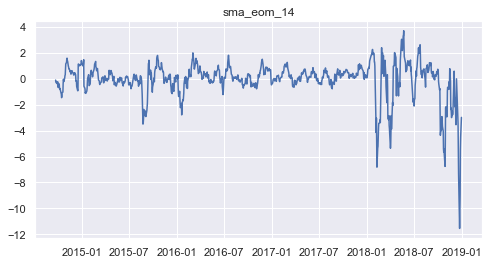

In [411]:
smaeom = ta.volume.sma_ease_of_movement(high,low,volume,window=14)
plot(smaeom)

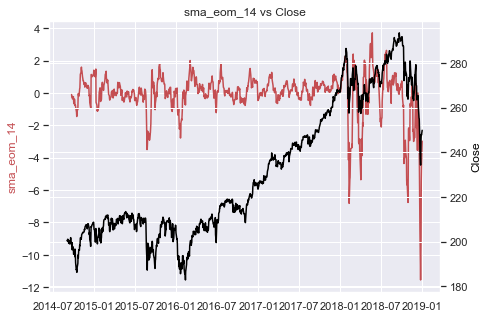

In [412]:
plot_with_close(smaeom)

In [413]:
corrmat(smaeom, sma_ret,'sma_eom_14','sma_ret_14')

sma_eom_14  sma_ret_14
sma_eom_14    1.000000    0.856702
sma_ret_14    0.856702    1.000000

**eom_1 selected.**

## Money Flow Index (MFI)

1. Typical Price = (High + Low + Close)/3

2. Raw Money Flow = Typical Price x Volume
3. Money Flow Ratio = (14-period Positive Money Flow)/(14-period Negative Money Flow)

4. Money Flow Index = 100 - 100/(1 + Money Flow Ratio)

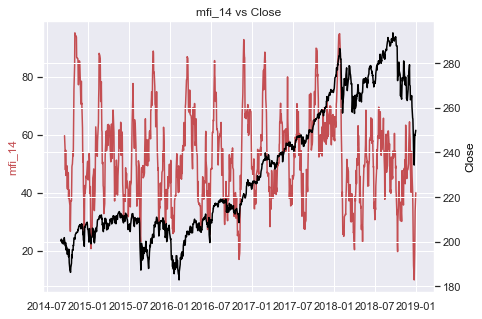

In [414]:
mfi = ta.volume.money_flow_index(high,low,close,volume,14)
plot_with_close(mfi)

In [415]:
mfi.describe()

count    1078.000000
mean       51.966732
std        15.276212
min         9.863313
25%        40.378721
50%        50.514936
75%        61.323525
max        95.107998
Name: mfi_14, dtype: float64

In [416]:
corrmat(mfi, sma_ret,'mfi_14','sma_ret_14')

mfi_14  sma_ret_14
mfi_14      1.000000    0.752408
sma_ret_14  0.752408    1.000000

mfi, sma_eom, sma of returns are all highly correlated.

**mfi selected.**

## Force Index (FI)

Force Index(1) = {Close (current period)  -  Close (prior period)} x Volume

Force Index(13) = 13-period EMA of Force Index(1)

- The Force Index is an indicator that uses price and volume to assess the power behind a move or identify possible turning points. 
- It is simply ema of momentum x volume
- The Force Index can be used to reinforce the overall trend, identify playable corrections or foreshadow reversals with divergences.

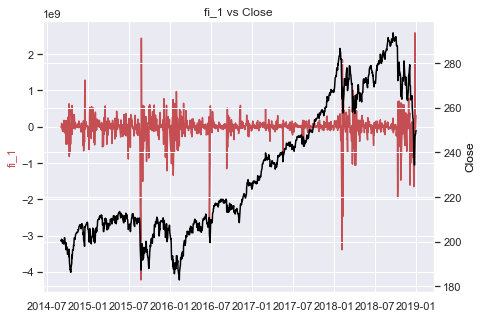

In [417]:
fi_1 = ta.volume.force_index(close,volume,window=1)
plot_with_close(fi_1)

In [418]:
corrmat(fi_1, close.pct_change(),'fi_1','ret1')

fi_1    ret1
fi_1  1.0000  0.9045
ret1  0.9045  1.0000

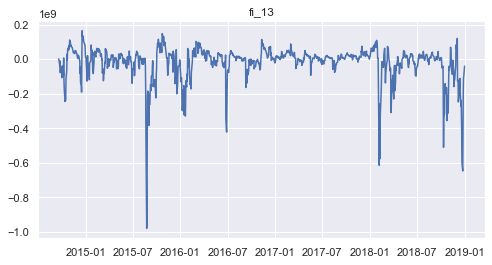

In [419]:
fi_13 = ta.volume.force_index(close,volume,window=13)
plot(fi_13)

In [420]:
corrmat(fi_13, ta.trend.ema_indicator(close,window=13).pct_change(),'fi_13','ema_ret_13')

fi_13  ema_ret_13
fi_13       1.000000    0.911589
ema_ret_13  0.911589    1.000000

we can replace price difference(returns) or ema of them with force index. 

## Negative Volume Index (NVI)

1. Cumulative NVI starts at 1000

2. Add the Percentage Price Change to Cumulative NVI when Volume Decreases

3. Cumulative NVI is Unchanged when Volume Increases

4. Apply a 255-day EMA for Signals


- The Negative Volume Index (NVI) is a cumulative indicator that uses the change in volume to decide when the smart money is active. 


- Dysart's Negative Volume Index works under the assumption that the smart money is active on days when volume decreases and the not-so-smart money is active on days when volume increases.

In [421]:
nvi = ta.volume.negative_volume_index(close,volume)

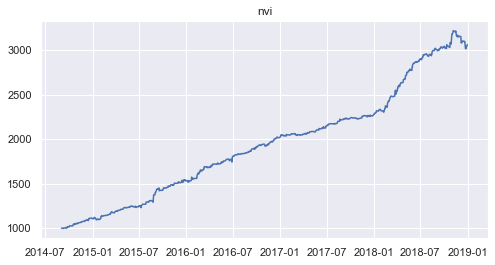

In [422]:
plot(nvi)

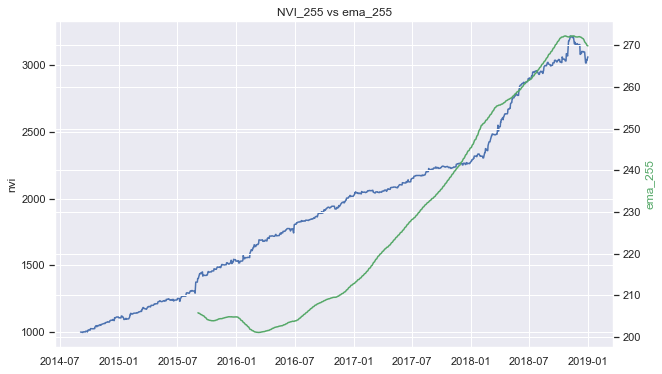

In [423]:
ema_close_255 = ta.trend.ema_indicator(close,window=255)

fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(nvi)
ax2.plot(ema_close_255,color='g')
ax1.set_ylabel('nvi')
ax2.set_ylabel('ema_255',c='g')
plt.title('NVI_255 vs ema_255')
plt.show()

## On-balance volume (OBV)

If the closing price is above the prior close price then: 
Current OBV = Previous OBV + Current Volume


If the closing price is below the prior close price then: 
Current OBV = Previous OBV  -  Current Volume


If the closing prices equals the prior close price then:
Current OBV = Previous OBV (no change)


- On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator, adding volume on up days and subtracting it on down days. 

- Chartists can look for divergences between OBV and price to predict price movements or use OBV to confirm price trends.

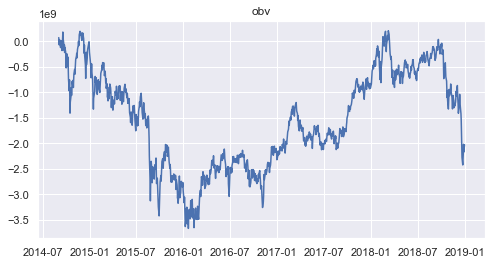

In [424]:
obv = ta.volume.on_balance_volume(close,volume)
plot(obv)

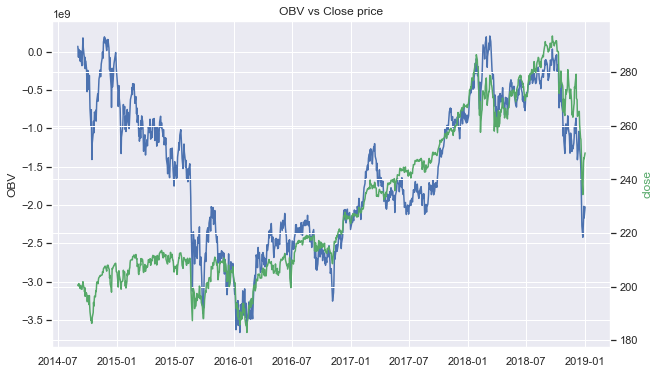

In [425]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax2 = ax1.twinx()
ax1.plot(obv)
ax2.plot(close,color='g')
ax1.set_ylabel('OBV')
ax2.set_ylabel('close',c='g')
plt.title('OBV vs Close price')
plt.show()

## Volume-price trend (VPT)

VPT = VPT(previous) + volume x (close-close_prev)/close_prev

Is based on a running cumulative volume that adds or substracts a multiple of the percentage change in share price trend and current volume, depending upon the investment’s upward or downward movements.

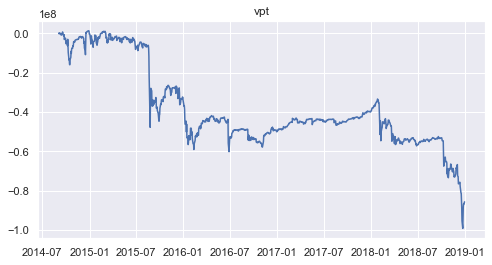

In [426]:
vpt = (volume*ret).cumsum().rename('vpt')
plot(vpt)

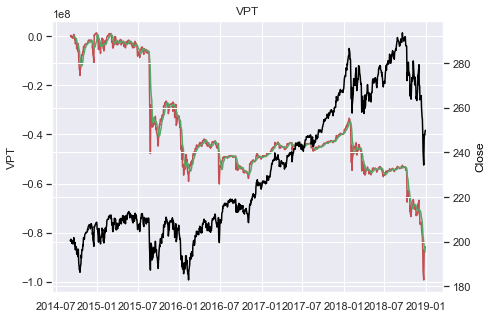

In [427]:
vpt_10 = vpt.rolling(10).mean()

fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(vpt,color='r')
ax1.plot(vpt_10,color='g')
ax2.plot(close,c='black')
ax1.set_ylabel('VPT')
ax2.set_ylabel('Close',c='black')
plt.title('VPT')
plt.show()

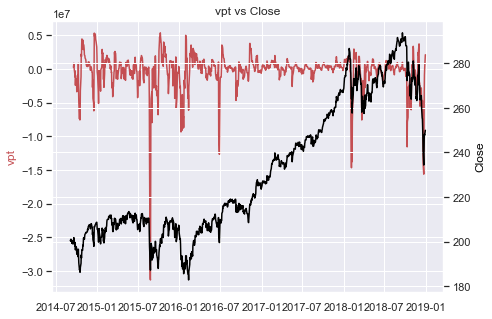

In [428]:
vpt_diff = vpt-vpt_10
plot_with_close(vpt_diff)

VPT_diff is selected

## Volume Weighted Average Price (VWAP)

Cumulative(Volume x Typical Price)/Cumulative(Volume)

Volume-Weighted Average Price (VWAP) is exactly what it sounds like: the average price weighted by volume. 

VWAP equals the dollar value of all trading periods divided by the total trading volume for the current day. 


In [429]:
vwap = ta.volume.volume_weighted_average_price(high,low,close,volume)

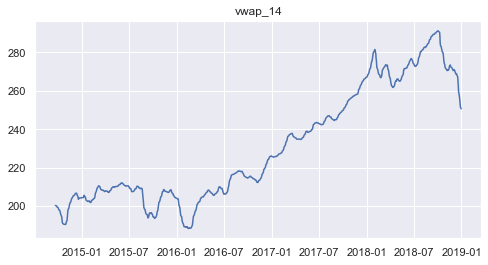

In [430]:
plot(vwap)

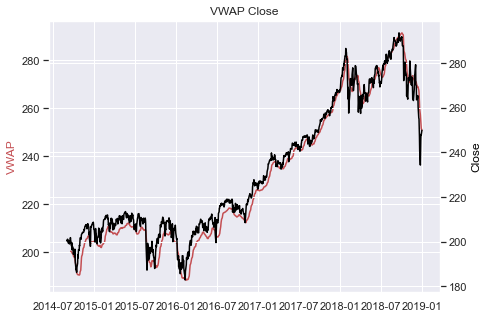

In [431]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(vwap,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('VWAP',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('VWAP Close')
plt.show()

## Volume overall

In [432]:
ti_volume = pd.DataFrame([money_flow_volume, eom, mfi ,fi_1]).T
ti_volume

Money Flow Volume      eom_1     mfi_14          fi_1
Date                                                             
2014-09-02       2.287263e+07        NaN        NaN           NaN
2014-09-03      -3.042000e+07   0.797337        NaN -6.320600e+06
2014-09-04      -3.640458e+07  -0.439230        NaN -2.471960e+07
2014-09-05       9.299528e+07  -0.557448        NaN  9.196200e+07
2014-09-08      -1.590496e+06   0.575292        NaN -3.335800e+07
...                       ...        ...        ...           ...
2018-12-24      -1.441710e+08 -32.513271   9.863313 -9.368916e+08
2018-12-26       2.184900e+08  13.727997  18.674785  2.586922e+09
2018-12-27       1.774856e+08  18.307376  26.745387  3.520503e+08
2018-12-28      -7.268384e+07  17.135859  33.505456 -4.899200e+07
2018-12-31       1.156522e+08  -0.179071  39.949494  3.131310e+08

[1091 rows x 4 columns]

# Volatility

In [433]:
df_volatility = allta[volatility].join([ret,sma_ret,close])

In [434]:
#before see corr, let's drop some unnecessary indicators like upper band, lower band etc.

volatility= ['volatility_atr','volatility_bbp','volatility_kcp','volatility_dcp','volatility_ui']
df_volatility = allta[volatility].join([ret,sma_ret,close])

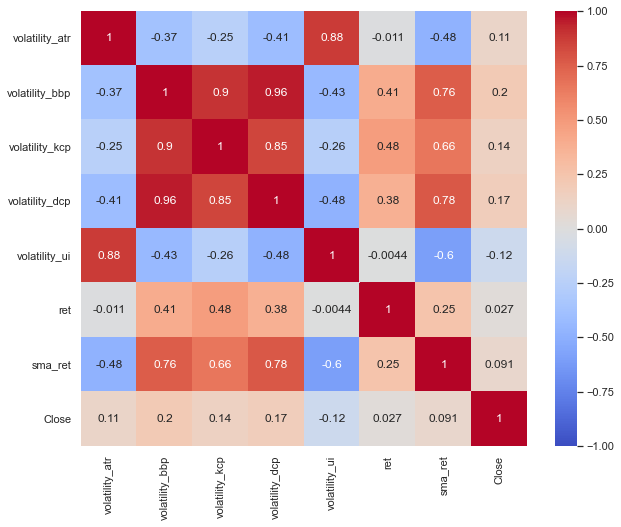

In [435]:
plt.figure(figsize=(10,8))
sns.heatmap(df_volatility.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

In [436]:
# Highly correlated market features
corr = df_volatility.corr()
h = 0.75
where = (abs(corr)>h) & (corr<1)

hc_list =[]
for i in range(len(np.where(where)[0])):
    hc_list.append(sorted([corr.columns[np.where(where)[0][i]], corr.columns[np.where(where)[1][i]]]))
hc_list = np.array(sorted(hc_list))[::2,:]
print('Pairs of above-{}-correlated features : \n '.format(h) , hc_list)

Pairs of above-0.75-correlated features : 
  [['sma_ret' 'volatility_bbp']
 ['sma_ret' 'volatility_dcp']
 ['volatility_atr' 'volatility_ui']
 ['volatility_bbp' 'volatility_dcp']
 ['volatility_bbp' 'volatility_kcp']
 ['volatility_dcp' 'volatility_kcp']]


## Average True Range (ATR)
True Range (TR), which is defined as the greatest of the following:

- Method 1: Current High less the current Low
- Method 2: Current High less the previous Close (absolute value)
- Method 3: Current Low less the previous Close (absolute value)


Current ATR = [(Prior ATR x 13) + Current TR] / 14

  - Multiply the previous 14-day ATR by 13.
  - Add the most recent day's TR value.
  - Divide the total by 14


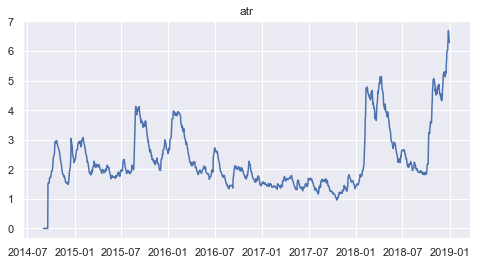

In [437]:
atr = ta.volatility.average_true_range(high,low,close,window=14)
plot(atr)

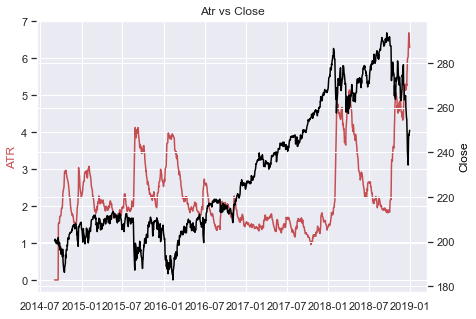

In [438]:
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()
ax1.plot(atr,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('ATR',c='r')
ax2.set_ylabel('Close',c='black')
plt.title('Atr vs Close')
plt.show()

## Bollinger Bands

* Middle Band = 20-day simple moving average (SMA)
* Upper Band = 20-day SMA + (20-day standard deviation of price x 2) 
* Lower Band = 20-day SMA - (20-day standard deviation of price x 2)


- P band: %B = (Price - Lower Band)/(Upper Band - Lower Band)
    - %B can be used to identify overbought and oversold situations.
    - More like momentum indicator
    
example

John Bollinger described a trend-following system using %B with the Money Flow Index (MFI). An uptrend begins when %B is above .80 and MFI(10) is above 80. MFI is bound between zero and one hundred. A move above 80 places MFI(10) in the upper 20% of its range, which is a strong reading. Downtrends are identified when %B is below .20 and MFI(10) is below 20.

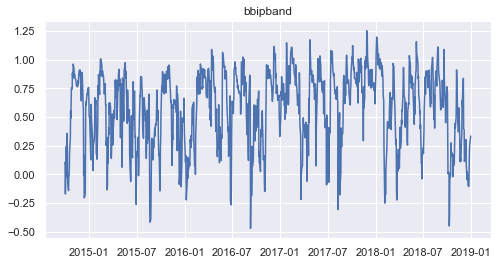

In [439]:
bbpi = ta.volatility.bollinger_pband(close,window=20)
plot(bbpi)

## Donchian Channel

Donchian Channels are three lines generated by moving average calculations that comprise an indicator formed by upper and lower bands around a midrange or median band.

- UC = Highest High in Last N Periods

- Middle Channel=((UC+LC)/2)

- LC = Lowest Low in Last N periods

The Difference Between Donchian Channels and Bollinger Bands

- Donchian Channels plot the highest high and lowest low over N periods while Bollinger Bands plot a simple moving average (SMA) for N periods plus/minus the standard deviation of price for N periods X 2. This results in a more balanced calculation that reduces the impact of big high or low prints.

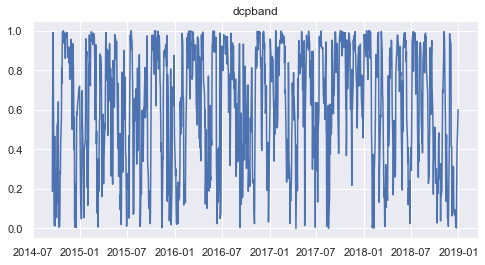

In [440]:
dcpi = ta.volatility.donchian_channel_pband(high,low,close)
plot(dcpi)

In [441]:
corrmat(bbpi,dcpi,'Bollinger Band %B','Donchian Channel %B')

Bollinger Band %B  Donchian Channel %B
Bollinger Band %B             1.000000             0.884584
Donchian Channel %B           0.884584             1.000000

Limitations of Using Donchian Channels

- Markets move according to many cycles of activity. An arbitrary or commonly used N period value for Donchian Channels may not reflect current market conditions, generating false signals that can undermine trading and investment performance.

## Keltner Channels

Keltner Channels are a trend following indicator used to identify reversals with channel breakouts and channel direction. Channels can also be used to identify overbought and oversold levels when the trend is flat.

- Middle Line: 20-day exponential moving average 
- Upper Channel Line: 20-day EMA + (2 x ATR(10))
- Lower Channel Line: 20-day EMA - (2 x ATR(10))

Keltner Channels vs. Bollinger Bands

- These two indicators are quite similar. Keltner Channels use ATR to calculate the upper and lower bands while Bollinger Bands use standard deviation instead.

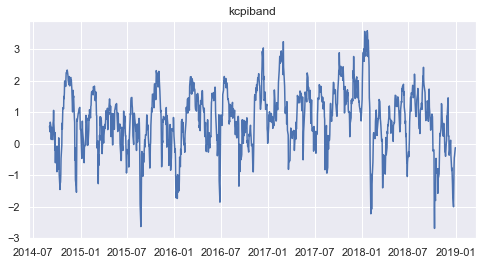

In [442]:
kcpi = ta.volatility.keltner_channel_pband(high,low,close).rename('kcpiband')
plot(kcpi)

In [443]:
pd.DataFrame([bbpi,dcpi,kcpi]).T.dropna().corr()

bbipband   dcpband  kcpiband
bbipband  1.000000  0.884584  0.930817
dcpband   0.884584  1.000000  0.818631
kcpiband  0.930817  0.818631  1.000000

Each bands' % indicators are correlated.

Keltner Channel Limitations

- While Keltner Channels can help identify trend direction, and even provide some trade signals, they are best used in conjunction with price action analysis, fundamentals if trading for the long term, and other technical indicators.

- The bands may also not act as support or resistance and they may seem to have little forecasting ability at all. This could be due to the settings chosen, but there is also no evidence that the price moving two ATRs or hitting one of the bands will result in a trading opportunity or something significant happening.

## Ulcer Index

Percent-Drawdown = ((Close - 14-period Max Close)/14-period Max Close) x 100

Squared Average = (14-period Sum of Percent-Drawdown Squared)/14 

Ulcer Index = Square Root of Squared Average

- Investors can use the Ulcer Index to compare different investment options. A lower average Ulcer Index means lower drawdown risk compared with an investment with a higher average UI. Applying a moving average to the Ulcer Index will show which stocks and funds have lower volatility overall.
- Watching for spikes in the Ulcer Index that are beyond "normal" can also be used to indicate times of excessive downside risk, which investors may wish to avoid by exiting long positions.

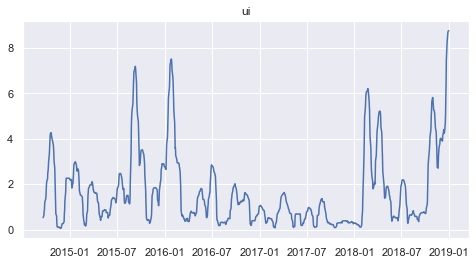

In [444]:
ui = ta.volatility.ulcer_index(close)
plot(ui)

In [445]:
# possible features
std_10 = close.rolling(10).std().rename('std_10')

In [446]:
ti_volatility = pd.DataFrame([bbpi,std_10]).T
ti_volatility

bbipband     std_10
Date                           
2014-09-02       NaN        NaN
2014-09-03       NaN        NaN
2014-09-04       NaN        NaN
2014-09-05       NaN        NaN
2014-09-08       NaN        NaN
...              ...        ...
2018-12-24 -0.105606  10.675105
2018-12-26  0.185881  10.271680
2018-12-27  0.250817   9.179889
2018-12-28  0.268384   7.530002
2018-12-31  0.333316   6.331802

[1091 rows x 2 columns]

# Trend

In [447]:
df_trend = allta[trend].join([ret,sma_ret,close])

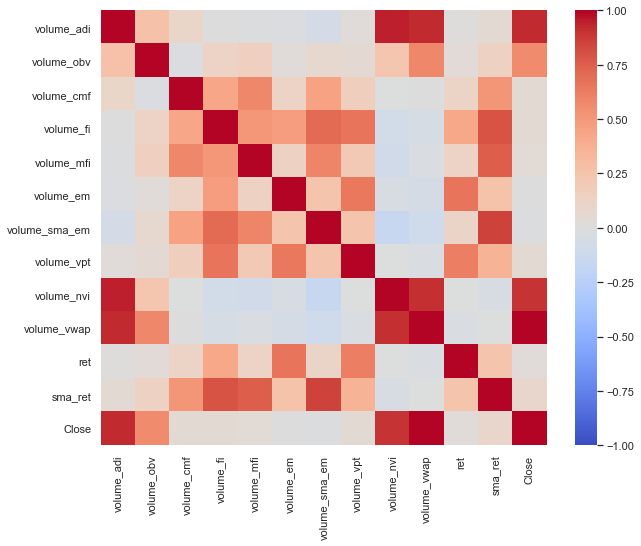

In [448]:
plt.figure(figsize=(10,8))
sns.heatmap(df_volumes.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=False)
plt.show()

## Simple Moving Average (SMA), Exponential Moving Average (EMA), Weighted Moving Average (WMA)



Exponential moving averages have less lag and are therefore more sensitive to recent prices - and recent price changes.

## Moving Average Convergence Divergence (MACD)


The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter one. As a result, the MACD offers the best of both worlds: trend following and momentum.

- MACD Line: (12-day EMA - 26-day EMA)

- Signal Line: 9-day EMA of MACD Line

- MACD Difference: MACD Line - Signal Line

- The values of 12, 26 and 9 are the typical settings used with the MACD, though other values can be substituted depending on your trading style and goals.

- MACD line crossover : Positive MACD indicates that the 12-day EMA is above the 26-day EMA. Positive values increase as the shorter EMA diverges further from the longer EMA. This means upside momentum is increasing. Negative MACD values indicate that the 12-day EMA is below the 26-day EMA. Negative values increase as the shorter EMA diverges further below the longer EMA. This means downside momentum is increasing.

- Signal line crossover (MACD diff sign): If the MACD crosses above its signal line following a brief correction within a longer-term uptrend, it qualifies as bullish confirmation.If the MACD crosses below its signal line following a brief move higher within a longer-term downtrend, traders would consider that a bearish confirmation. 

In [449]:
MACD = ta.trend.MACD(close,26,12,9)
macd = MACD.macd()
macd_signal = MACD.macd_signal()
macd_diff = MACD.macd_diff()

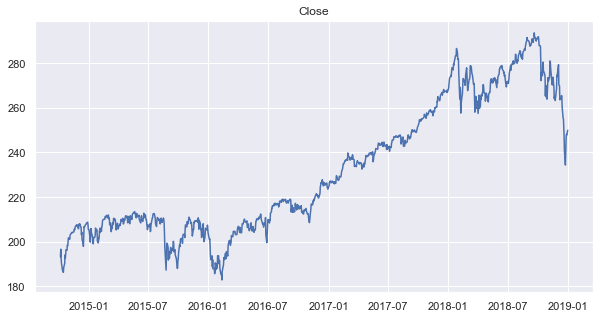

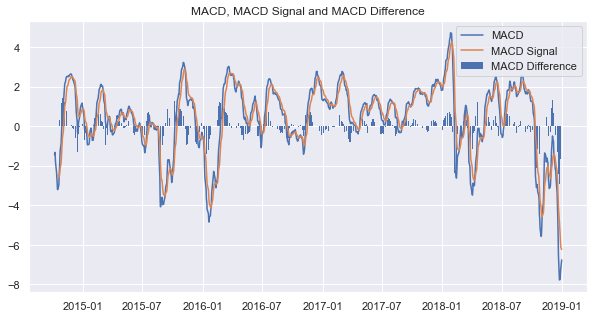

In [450]:
plot(close.loc[macd.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(macd, label='MACD')
plt.plot(macd_signal, label='MACD Signal')
plt.bar(macd_diff.index,macd_diff, linewidth = 0, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

## Average Directional Movement Index (ADX)

The Plus Directional Indicator (+DI) and Minus Directional Indicator (-DI) are derived from smoothed averages of these differences and measure trend direction over time. These two indicators are often collectively referred to as the Directional Movement Indicator (DMI).

The Average Directional Index (ADX) is in turn derived from the smoothed averages of the difference between +DI and -DI; it measures the strength of the trend (regardless of direction) over time.

Usage

1. **Many traders will use ADX readings above 25 to suggest that the trend is strong enough for trend-trading strategies. Conversely, when ADX is below 25, many will avoid trend-trading strategies.**


2. When the +DMI is above the -DMI, prices are moving up, and ADX measures the strength of the uptrend. When the -DMI is above the +DMI, prices are moving down, and ADX measures the strength of the downtrend.

In [451]:
ADX = ta.trend.ADXIndicator(high,low,close,window=14)

In [452]:
adx = ADX.adx()
adx_pos = ADX.adx_pos()
adx_neg = ADX.adx_neg()

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


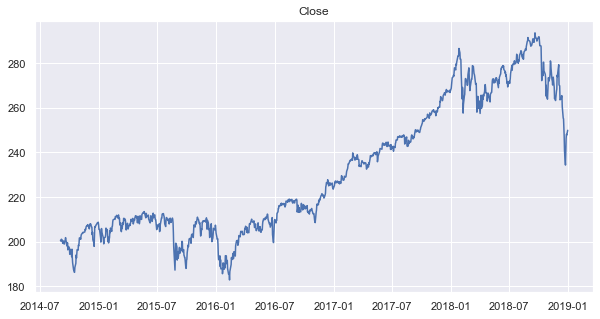

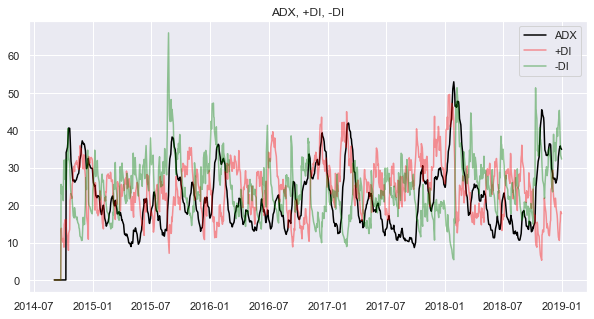

In [453]:
plot(close.loc[adx.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(adx, label='ADX',c='black')
plt.plot(adx_pos, label='+DI',c='red',alpha=0.4)
plt.plot(adx_neg, label='-DI',c='green',alpha=0.4)
plt.title('ADX, +DI, -DI')
plt.legend()
plt.show()

## Vortex Indicator (VI)

+VM = Current High less Prior Low (absolute value)

-VM = Current Low less Prior High (absolute value)

+VM14 = 14-period Sum of +VM

-VM14 = 14-period Sum of -VM


True Range (TR) is the greatest of:
  * Current High less current Low
  * Current High less previous Close (absolute value)
  * Current Low less previous Close (absolute value)

TR14 = 14-period Sum of TR

+VI14 = +VM14/TR14
-VI14 = -VM14/TR14

- The Vortex Indicator (VTX) can be used to identify the start of a trend and subsequently affirm trend direction. First, a simple cross of the two oscillators can be used to signal the start of a trend. After this crossover, the trend is up when +VI is above -VI and down when -VI is greater than +VI. Second, a cross above or below a particular level can signal the start of a trend and these levels can be used to affirm trend direction.

In [454]:
vi_p=allta.trend_vortex_ind_pos
vi_n=allta.trend_vortex_ind_neg
vi_diff = allta.trend_vortex_ind_diff

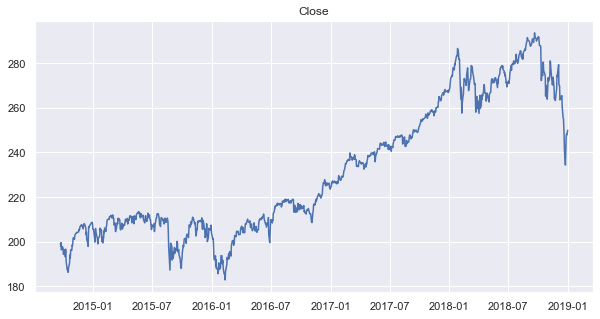

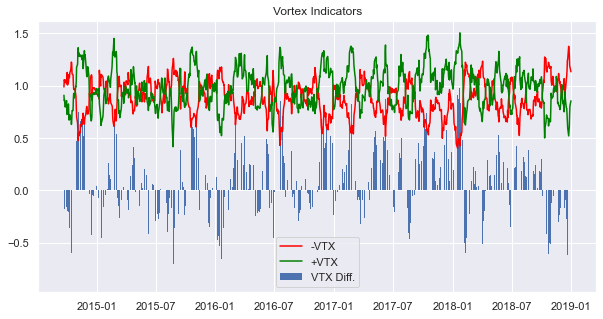

In [455]:
plot(close.loc[vi_p.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,5))
plt.bar(vi_diff.index, vi_diff, label='VTX Diff.', linewidth=0)
plt.plot(vi_n, label='-VTX',c='red')
plt.plot(vi_p, label='+VTX',c='green')
plt.title('Vortex Indicators')
plt.legend()
plt.show()

In [456]:
corrmat(macd_diff, vi_diff, 'MACD Diff','VTX Diff')

MACD Diff  VTX Diff
MACD Diff   1.000000  0.678272
VTX Diff    0.678272  1.000000

## Trix (TRIX)
1. Single-Smoothed EMA = 15-period EMA of the closing price
2. Double-Smoothed EMA = 15-period EMA of Single-Smoothed EMA
3. Triple-Smoothed EMA = 15-period EMA of Double-Smoothed EMA
4. TRIX = 1-period percent change in Triple-Smoothed EMA


- TRIX is a momentum oscillator that displays the percent rate of change of a triple exponentially smoothed moving average. 
- With its triple smoothing, TRIX is designed to filter out insignificant price movements.
- Chartists can use TRIX to generate signals similar to MACD. A signal line can be applied to look for signal line crossovers. A directional bias can be determined with the absolute level. Bullish and bearish divergences can be used to anticipate reversals.

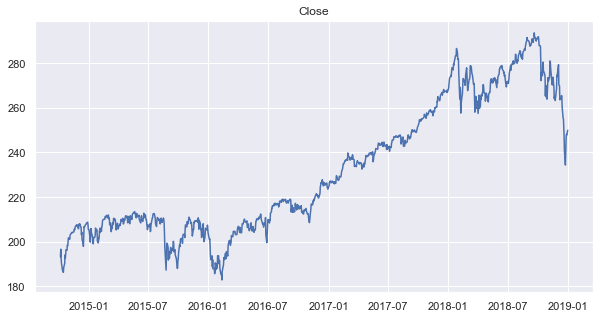

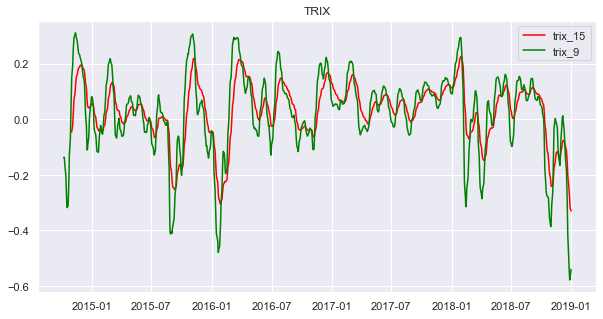

In [457]:
trix_15 = ta.trend.trix(close,15)
trix_9 = ta.trend.trix(close,9)

plot(close.loc[trix_9.dropna().index],figsize=(10,5))

plt.figure(figsize=(10,5))
plt.plot(trix_15, label='trix_15',c='red')
plt.plot(trix_9, label='trix_9',c='green')
plt.title('TRIX')
plt.legend()
plt.show()

In [458]:
corrmat(trix_15,macd,'TRIX_15', 'MACD_26')

TRIX_15   MACD_26
TRIX_15  1.000000  0.913098
MACD_26  0.913098  1.000000

## Mass Index (MI)

Single EMA = 9-period exponential moving average (EMA) of the high-low differential  

Double EMA = 9-period EMA of the 9-period EMA of the high-low differential 

EMA Ratio = Single EMA divided by Double EMA 

Mass Index = 25-period sum of the EMA Ratio 

- the Mass Index uses the high-low range to identify trend reversals based on range expansions. In this sense, the Mass Index is a volatility indicator that does not have a directional bias. Instead, the Mass Index identifies range bulges that can foreshadow a reversal of the current trend.

- Dorsey hypothesized that, when the figure jumps above 27—creating a “bulge”—and then drops below 26.5, the stock is ready to change course. An index of 27 represents a rather volatile stock, so some traders set a lower baseline when determining the presence of a price bulge.

In [459]:
mi = allta.trend_mass_index

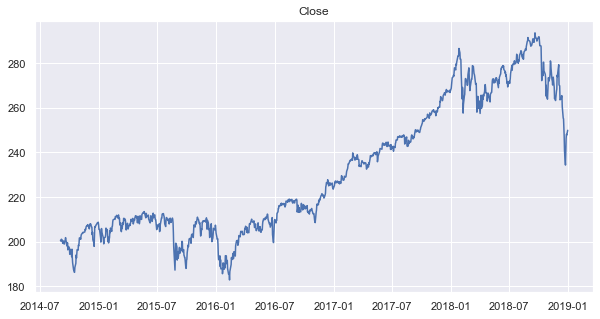

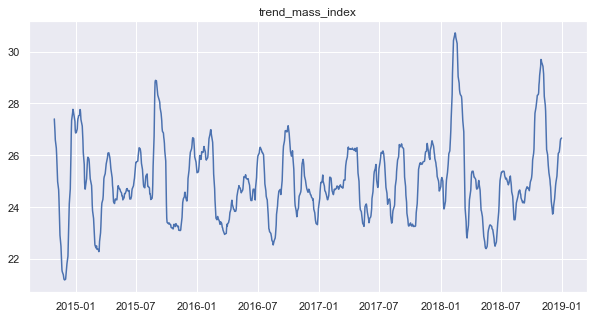

In [460]:
plot(close,figsize=(10,5))
plot(mi,figsize=(10,5))

## Commodity Channel Index (CCI)

the Commodity Channel Index (CCI) is a versatile indicator that can be used to identify a new trend or warn of extreme conditions.

CCI = (Typical Price  -  20-period SMA of TP) / (.015 x Mean Deviation)

Typical Price (TP) = (High + Low + Close)/3

Constant = .015

There are four steps to calculating the Mean Deviation: 
- First, subtract the most recent 20-period average of the typical price from each period's typical price. 
- Second, take the absolute values of these numbers. 
- Third, sum the absolute values. 
- Fourth, divide by the total number of periods (20). 

Lambert set the constant at .015 to ensure that approximately 70 to 80 percent of CCI values would fall between -100 and +100. This percentage also depends on the look-back period. A shorter CCI (10 periods) will be more volatile with a smaller percentage of values between +100 and -100. Conversely, a longer CCI (40 periods) will have a higher percentage of values between +100 and -100.


CCI measures the difference between a security's price change and its average price change. High positive readings indicate that prices are well above their average, which is a show of strength. Low negative readings indicate that prices are well below their average, which is a show of weakness.

The Commodity Channel Index (CCI) can be used as either a coincident or leading indicator. 
- As a coincident indicator, surges above +100 reflect strong price action that can signal the start of an uptrend. Plunges below -100 reflect weak price action that can signal the start of a downtrend.
- As a leading indicator, chartists can look for overbought or oversold conditions that may foreshadow a mean reversion. Similarly, bullish and bearish divergences can be used to detect early momentum shifts and anticipate trend reversals.

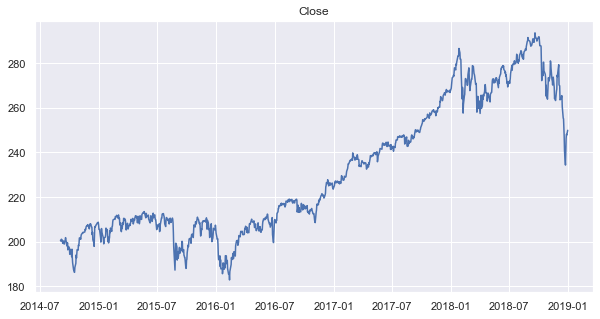

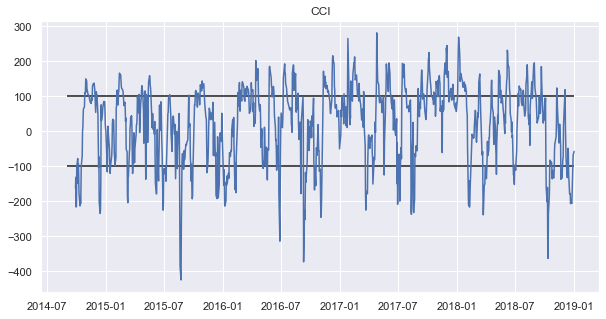

In [461]:
cci = allta.trend_cci
plot(close, figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(cci)
plt.title('CCI')
plt.hlines(100,cci.index[0],cci.index[-1])
plt.hlines(-100,cci.index[0],cci.index[-1])
plt.show()

## Detrended Price Oscillator (DPO)

Price {X/2 + 1} periods ago less the X-period simple moving average.


The Detrended Price Oscillator shows the difference between a past price and a simple moving average. In contrast to other price oscillators, DPO is not a momentum indicator. Instead, it is simply designed to identify cycles with its peaks and troughs. Cycles can be estimated by counting the periods between peaks or troughs. Users can experiment with shorter and longer DPO settings to find the best fit.

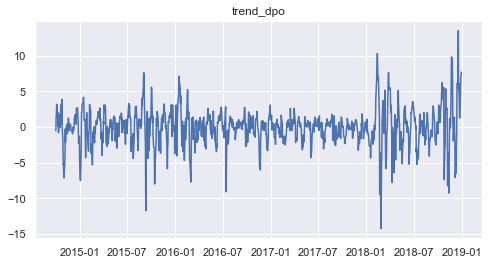

In [462]:
dpo = allta.trend_dpo
plot(dpo)

## KST Oscillator (KST)

RCMA1 = 10-Period SMA of 10-Period Rate-of-Change 
RCMA2 = 10-Period SMA of 15-Period Rate-of-Change 
RCMA3 = 10-Period SMA of 20-Period Rate-of-Change 
RCMA4 = 15-Period SMA of 30-Period Rate-of-Change 

KST = (RCMA1 x 1) + (RCMA2 x 2) + (RCMA3 x 3) + (RCMA4 x 4)  

Signal Line = 9-period SMA of KST

KST fluctuates above/below the zero line. At its most basic, momentum favors the bulls when KST is positive and favors the bears when KST is negative. A positive reading means the weighted and smoothed rate-of-change values are mostly positive and prices are moving higher. A negative reading indicates that prices are moving lower.

After basic centerline crossovers, chartists can look for signal line crossovers and gauge general direction. KST is generally rising when above its signal line and falling when below its signal line. A rising and negative KST line indicates that downside momentum is waning. Conversely, a falling and positive KST line indicates that upside momentum is waning.

In [463]:
kst = allta.trend_kst
kst_sig = allta.trend_kst_sig
kst_diff = allta.trend_kst_diff

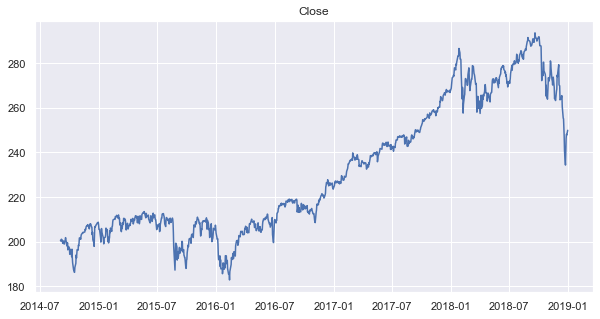

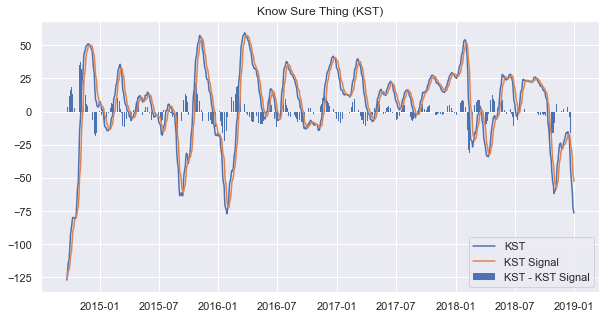

In [464]:
plot(close,figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(kst, label='KST')
plt.plot(kst_sig, label='KST Signal')
plt.bar(kst_diff.index, kst_diff, label='KST - KST Signal', linewidth=0)
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()

In [465]:
corrmat(kst_diff, macd_diff,'kst_d','macd_d')

kst_d    macd_d
kst_d   1.000000  0.815532
macd_d  0.815532  1.000000

In [466]:
corrmat(kst, macd,'kst','macd')

kst      macd
kst   1.000000  0.901086
macd  0.901086  1.000000

## Ichimoku Kinkō Hyō (Ichimoku)

Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))

- The default setting is 9 periods and can be adjusted. On a daily chart, this line is the midpoint of the 9-day high-low range, 
which is almost two weeks

Kijun-sen (Base Line): (26-period high + 26-period low)/2))

- The default setting is 26 periods and can be adjusted. On a daily chart, this line is the midpoint of the 26-day high-low range, which is almost one month).  

Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))

- This is the midpoint between the Conversion Line and the Base Line. The Leading Span A forms one of the two cloud boundaries. It is referred to as "Leading" because it is plotted 26 periods in the future and forms the faster cloud boundary. 
 
Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))

- On the daily chart, this line is the midpoint of the 52-day high-low range, which is a little less than 3 months. The default calculation setting is 52 periods, but can be adjusted. This value is plotted 26 periods in the future and forms the slower cloud boundary.

Chikou Span (Lagging Span): Close plotted 26 days in the past

- The default setting is 26 periods, but can be adjusted. 

In [467]:
ichimoku_a = allta.trend_ichimoku_a
ichimoku_b = allta.trend_ichimoku_b
ichimoku_base = allta.trend_ichimoku_base
ichimoku_conv = allta.trend_ichimoku_conv

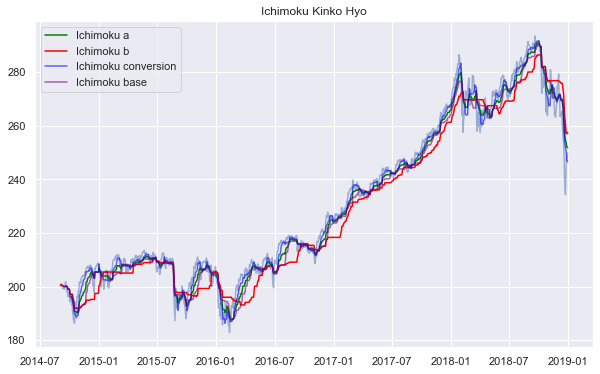

In [468]:
plt.figure(figsize=(10,6))
plt.plot(close,alpha=0.5)
plt.plot(ichimoku_a, label='Ichimoku a',c='green')
plt.plot(ichimoku_b, label='Ichimoku b',c='red')
plt.plot(ichimoku_conv, label='Ichimoku conversion',c='blue', alpha=0.6)
plt.plot(ichimoku_base, label='Ichimoku base',c='purple',alpha=0.6)
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

https://school.stockcharts.com/doku.php?id=technical_indicators:ichimoku_cloud

The trend-following signals focus on the cloud, while the momentum signals focus on the Conversion and Base Lines. In general, movements above or below the cloud define the overall trend. Within that trend, the cloud changes color as the trend ebbs and flows. Once the trend is identified, the Conversion Line and Base Line act similar to MACD for signal generation. And finally, simple price movements above or below the Base Line can be used to generate signals.

Bullish Signals:

- Price moves above cloud (trend)
- Cloud turns from red to green (ebb-flow within trend)
- Price Moves above the Base Line (momentum)
- Conversion Line moves above Base Line (momentum)

Bearish Signals:

- Price moves below cloud (trend)
- Cloud turns from green to red (ebb-flow within trend)
- Price Moves below Base Line (momentum)
- Conversion Line moves below Base Line (momentum)

## Parabolic Stop And Reverse (Parabolic SAR)

SAR stands for “stop and reverse"



Prior SAR: The SAR value for the previous period. 

Extreme Point (EP): The highest high/lowest low of the current uptrend. 

Acceleration Factor (AF): Starting at .02, AF increases by .02 each time the extreme point makes a new high. AF can reach a maximum of .20, no matter how long the uptrend extends. 

Current SAR = Prior SAR + Prior AF(Prior EP - Prior SAR)
13-Apr-10 SAR = 48.28 = 48.13 + .14(49.20 - 48.13)

The Acceleration Factor is multiplied by the difference between the Extreme Point and the prior period's SAR. This is then added to the prior period's SAR. Note however that SAR can never be above the prior two periods' lows. Should SAR be above one of those lows, use the lowest of the two for SAR. 

In [469]:
psar_down = allta.trend_psar_down
psar_down_ind = allta.trend_psar_down_indicator
psar_up = allta.trend_psar_up
psar_up_ind = allta.trend_psar_up_indicator

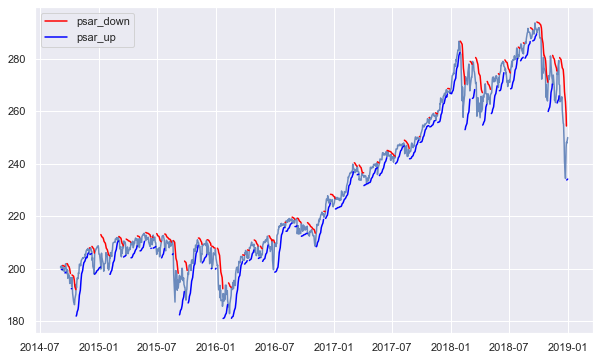

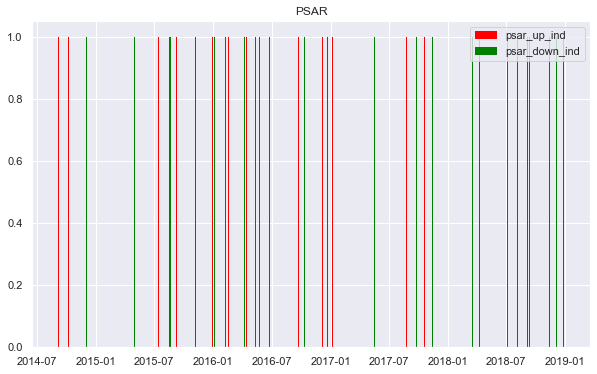

In [470]:
plt.figure(figsize=(10,6))
plt.plot(close,alpha=0.8)
plt.plot(psar_down, label='psar_down',c='red')
plt.plot(psar_up, label='psar_up',c='blue')
plt.legend()
plt.show()
plt.figure(figsize=(10,6))
plt.bar(psar_up_ind.index,psar_up_ind, label='psar_up_ind',color='red', linewidth=0)
plt.bar(psar_down_ind.index, psar_down_ind, label='psar_down_ind',color='green', linewidth=0)
plt.title('PSAR')
plt.legend()
plt.show()

The Parabolic SAR works best with trending securities, which occur roughly 30% of the time according to Wilder's estimates. This means the indicator will be prone to whipsaws over 50% of the time or when a security is not trending. After all, SAR is designed to catch the trend and follow it like a trailing stop. As with most indicators, the signal quality depends on the settings and the characteristics of the underlying security.

## Schaff Trend Cycle (STC)

While STC is computed using the same exponential moving averages as MACD, it adds a novel cycle component to improve accuracy and reliability. While MACD is simply computed using a series of moving average, the cycle aspect of STC is based on time (e.g. number of days).


It should also be noted that, although STC was developed primarily for fast currency markets, it may be effectively employed across all markets, just like MACD. It can be applied to intraday charts, such as five minutes or one hour charts, as well as daily, weekly, or monthly time frames.

In [471]:
stc = allta.trend_stc

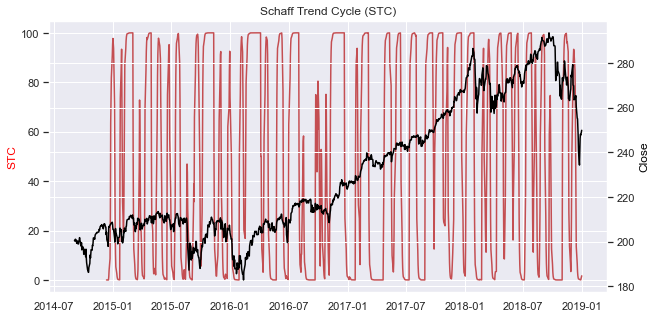

In [472]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax2 = ax1.twinx()
ax1.plot(stc,color='r')
ax2.plot(close,c='black')
ax1.set_ylabel('STC',c='red')
ax2.set_ylabel('Close',c='black')
plt.title('Schaff Trend Cycle (STC)')
plt.show()

## Aroon Indicator

Identify when trends are likely to change direction.

Aroon Up = ((N - Days Since N-day High) / N) x 100 

Aroon Down = ((N - Days Since N-day Low) / N) x 100 

Aroon Indicator = Aroon Up - Aroon Down

The Aroon Up and the Aroon Down lines fluctuate between zero and 100, with values close to 100 indicating a strong trend and values near zero indicating a weak trend. The lower the Aroon Up, the weaker the uptrend and the stronger the downtrend, and vice versa.

The indicator focuses on the last 25 periods, but is scaled to zero and 100. Therefore, an Aroon Up reading above 50 means the price made a new high within the last 12.5 periods. A reading near 100 means a high was seen very recently. The same concepts apply to the Down Aroon. When it is above 50, a low was witnessed within the 12.5 periods. A Down reading near 100 means a low was seen very recently.

Crossovers can signal entry or exit points. Up crossing above Down can be a signal to buy. Down crossing below Up may be a signal to sell.

In [473]:
aroon_down = allta.trend_aroon_down
aroon_up = allta.trend_aroon_up
aroon_ind = allta.trend_aroon_ind

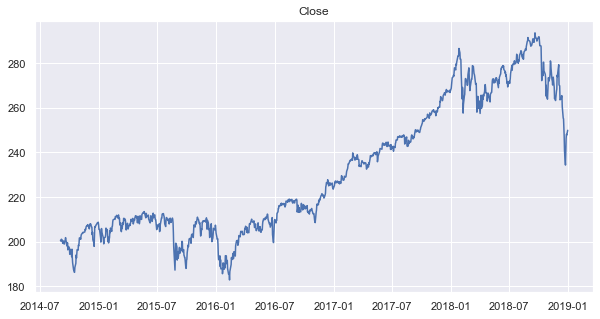

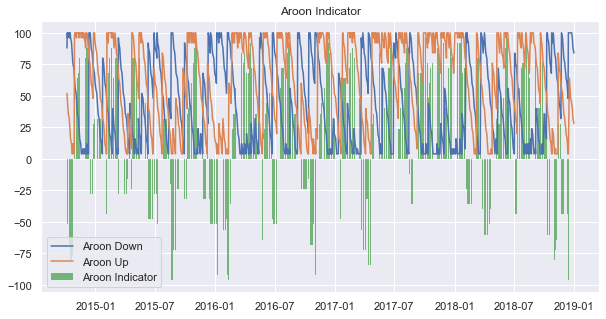

In [474]:
plot(close,figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(aroon_down, label='Aroon Down')
plt.plot(aroon_up, label='Aroon Up')
plt.bar(aroon_ind.index, aroon_ind, label='Aroon Indicator',color='green', linewidth=0, alpha=0.5)
plt.title('Aroon Indicator')
plt.legend()
plt.show()

enter when indicator go positive.

In [475]:
feat = ['trend_macd_diff','trend_vortex_ind_diff','trend_cci','trend_dpo','trend_kst_diff', 'trend_aroon_ind']

In [476]:
ti_trend = allta[feat]
ti_trend

trend_macd_diff  trend_vortex_ind_diff   trend_cci  trend_dpo  \
Date                                                                        
2014-09-02              NaN                    NaN         NaN        NaN   
2014-09-03              NaN                    NaN         NaN        NaN   
2014-09-04              NaN                    NaN         NaN        NaN   
2014-09-05              NaN                    NaN         NaN        NaN   
2014-09-08              NaN                    NaN         NaN        NaN   
...                     ...                    ...         ...        ...   
2018-12-24        -2.948222              -0.855176 -206.022183     1.2460   
2018-12-26        -2.336859              -0.688918 -135.758745     2.8120   
2018-12-27        -1.661229              -0.444730  -98.963991     3.8885   
2018-12-28        -1.117986              -0.367385  -68.335167     6.5600   
2018-12-31        -0.524744              -0.276900  -57.492335     7.6730   

            trend_kst_diff  trend_aroon_ind  
Date                                         
2014-09-02             NaN              NaN  
2014-09-03             NaN              NaN  
2014-09-04             NaN              NaN  
2014-09-05             NaN              NaN  
2014-09-08             NaN              NaN  
...                    ...              ...  
2018-12-24      -25.043317            -56.0  
2018-12-26      -26.442115            -56.0  
2018-12-27      -26.105998            -56.0  
2018-12-28      -26.185191            -56.0  
2018-12-31      -23.998171            -56.0  

[1091 rows x 6 columns]

# Momentum

In [477]:
df_mom = allta[momentum].join([ret,sma_ret,close])

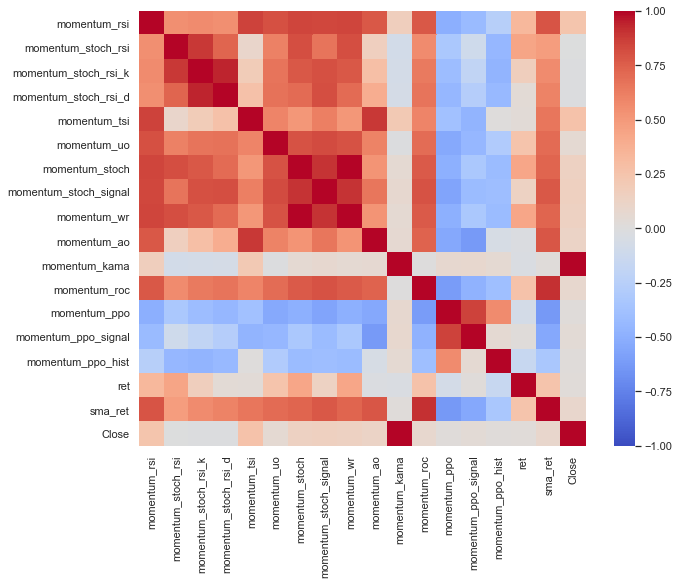

In [478]:
plt.figure(figsize=(10,8))
sns.heatmap(df_mom.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=False)
plt.show()

## Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.

RSI = 100 - 100/1+RS

RS = Average Gain / Average Loss

Wilder considered RSI overbought above 70 and oversold below 30.

In [479]:
rsi = allta.momentum_rsi

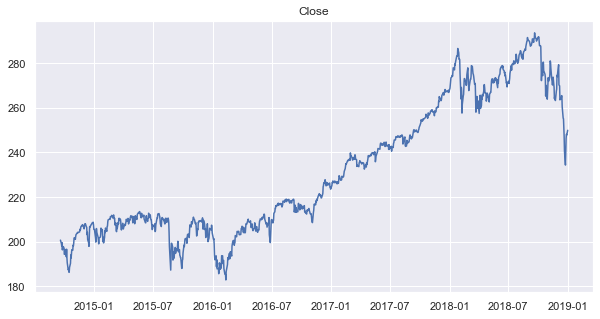

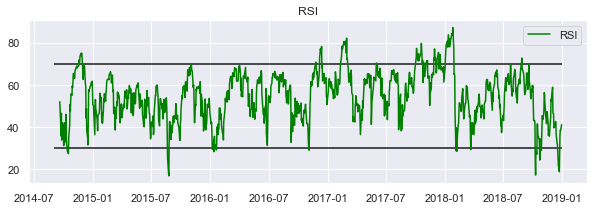

In [480]:
plot(close.loc[rsi.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(rsi, label='RSI',c='green')
plt.hlines(70,rsi.index[0],rsi.index[-1])
plt.hlines(30,rsi.index[0],rsi.index[-1])
plt.title('RSI')
plt.legend()
plt.show()

## Stochastic RSI (SRSI)

The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security’s historical performance rather than a generalized analysis of price change.

StochRSI = (RSI - Lowest Low RSI) / (Highest High RSI - Lowest Low RSI)

- 14-day StochRSI equals 0 when RSI is at its lowest point for 14 days.

- 14-day StochRSI equals 1 when RSI is at its highest point for 14 days.

- 14-day StochRSI equals .5 when RSI is in the middle of its 14-day high-low range.

- 14-day StochRSI equals .2 when RSI is near the low of its 14-day high-low range.

- 14-day StochRSI equals .80 when RSI is near the high of its 14-day high-low range.

First, it can be used to identify overbought or oversold conditions. A move above .80 is considered overbought, while a move below .20 is considered oversold. 

Second, it can be used to identify the short-term trend. As a bound oscillator, the centerline is at .50. StochRSI reflects an uptrend when consistently above .50 and a downtrend when consistently below .50. Because this indicator is quite volatile, some smoothing with a moving average can help for short-term trend identification.

In [481]:
stoch_rsi = allta.momentum_stoch_rsi
stoch_rsi_d = allta.momentum_stoch_rsi_d
stoch_rsi_k = allta.momentum_stoch_rsi_k

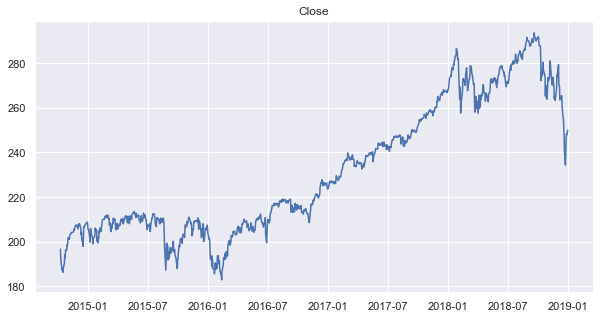

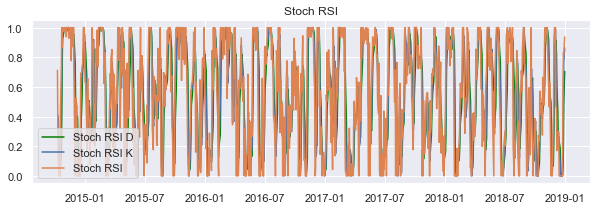

In [482]:
plot(close.loc[stoch_rsi.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(stoch_rsi_d, label='Stoch RSI D',c='green')
plt.plot(stoch_rsi_k, label='Stoch RSI K')
plt.plot(stoch_rsi, label='Stoch RSI')
plt.title('Stoch RSI')
plt.legend()
plt.show()

## True strength index (TSI)

Double Smoothed PC

- PC = Current Price minus Prior Price
- First Smoothing = 25-period EMA of PC
- Second Smoothing = 13-period EMA of 25-period EMA of PC

Double Smoothed Absolute PC

- Absolute Price Change |PC| = Absolute Value of Current Price minus Prior Price
- First Smoothing = 25-period EMA of |PC|
- Second Smoothing = 13-period EMA of 25-period EMA of |PC|

TSI = 100 x (Double Smoothed PC / Double Smoothed Absolute PC)

The True Strength Index (TSI) is an oscillator that fluctuates between positive and negative territory. As with many momentum oscillators, the centerline defines the overall bias. The bulls have the momentum edge when TSI is positive and the bears have the edge when it's negative. 

As with MACD, a signal line can be applied to identify upturns and downturns. Signal line crossovers are, however, quite frequent and require further filtering with other techniques.

In [483]:
tsi = allta.momentum_tsi #25,13

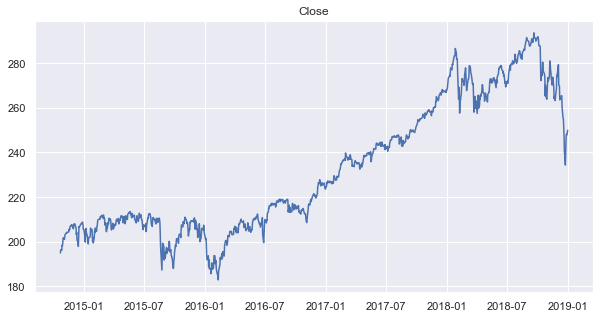

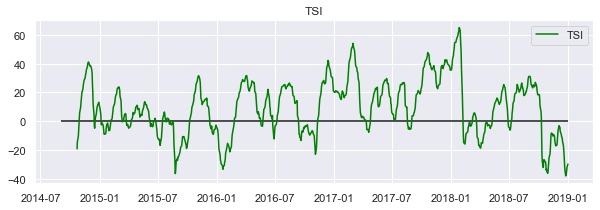

In [484]:
plot(close.loc[tsi.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(tsi, label='TSI',c='green')
plt.hlines(0,tsi.index[0],tsi.index[-1])
plt.title('TSI')
plt.legend()
plt.show()

In [485]:
corrmat(rsi,tsi,'rsi','tsi')

rsi       tsi
rsi  1.000000  0.854702
tsi  0.854702  1.000000

## Ultimate Oscillator (UO)

BP = Close - Minimum(Low or Prior Close).
 
TR = Maximum(High or Prior Close)  -  Minimum(Low or Prior Close)

Average7 = (7-period BP Sum) / (7-period TR Sum)
Average14 = (14-period BP Sum) / (14-period TR Sum)
Average28 = (28-period BP Sum) / (28-period TR Sum)

UO = 100 x [(4 x Average7)+(2 x Average14)+Average28]/(4+2+1)

There are three steps to a buy signal. 
- First, a bullish divergence forms between the indicator and security price. This means the Ultimate Oscillator forms a higher low as price forges a lower low. The higher low in the oscillator shows less downside momentum. 
- Second, the low of the bullish divergence should be below 30. This is to ensure that prices are somewhat oversold or at a relative extremity. 
- Third, the oscillator rises above the high of the bullish divergence.

In [486]:
uo = allta.momentum_uo

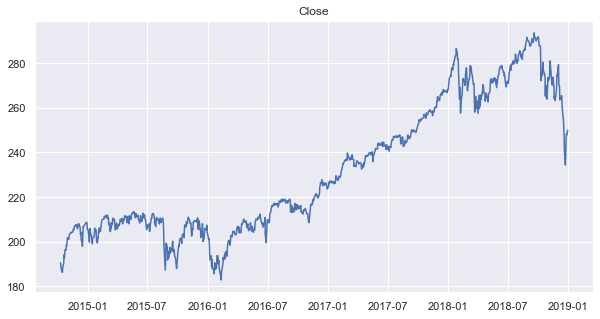

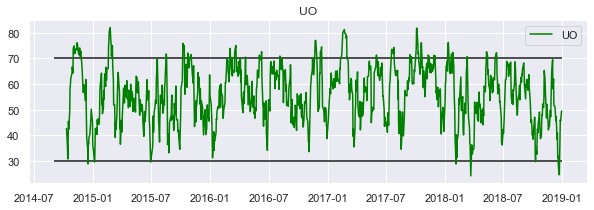

In [487]:
plot(close.loc[uo.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(uo, label='UO',c='green')
plt.hlines(70,uo.index[0],uo.index[-1])
plt.hlines(30,uo.index[0],uo.index[-1])
plt.title('UO')
plt.legend()
plt.show()

In [488]:
corrmat(uo,rsi,'uo','rsi')

uo       rsi
uo   1.000000  0.811062
rsi  0.811062  1.000000

## Stochastic Oscillator (SR)

%K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100

%D = 3-day SMA of %K

Lowest Low = lowest low for the look-back period

Highest High = highest high for the look-back period

%K is multiplied by 100 to move the decimal point two places

Traditional settings use 80 as the overbought threshold and 20 as the oversold threshold. These levels can be adjusted to suit analytical needs and security characteristics. Readings above 80 for the 20-day Stochastic Oscillator would indicate that the underlying security was trading near the top of its 20-day high-low range. Readings below 20 occur when a security is trading at the low end of its high-low range.

In [489]:
stoch_k = allta.momentum_stoch
stoch_d = allta.momentum_stoch_signal

stoch_div = (stoch_k - stoch_d).rename('stoch_diff')

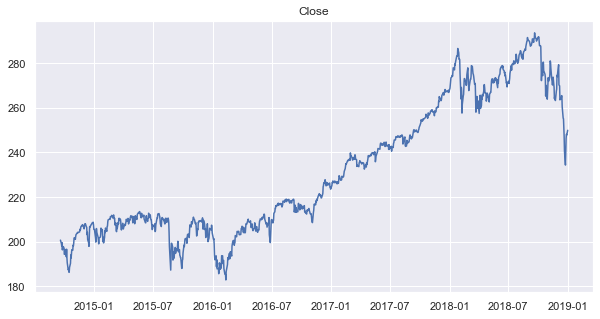

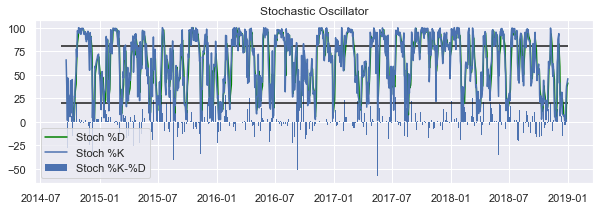

In [490]:
plot(close.loc[stoch_k.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(stoch_d, label='Stoch %D',c='green')
plt.plot(stoch_k, label='Stoch %K')
plt.hlines(80,stoch_k.index[0],stoch_k.index[-1])
plt.hlines(20,stoch_k.index[0],stoch_k.index[-1])
plt.bar(stoch_div.index,stoch_div, label='Stoch %K-%D', linewidth =0)
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

**STOCHASTIC SLOW**

In [491]:
stoch_k_slow = sma(allta.momentum_stoch,3)
stoch_d_slow = sma(stoch_k_slow,3)

stoch_div_slow = stoch_k_slow - stoch_d_slow

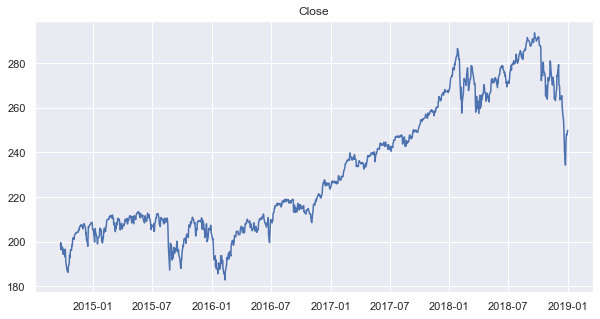

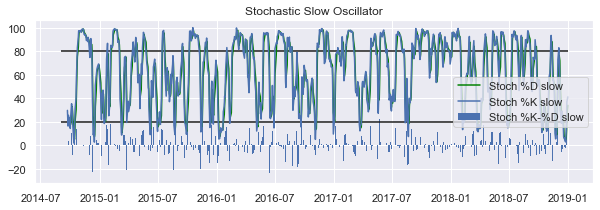

In [492]:
plot(close.loc[stoch_k_slow.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(stoch_d_slow, label='Stoch %D slow',c='green')
plt.plot(stoch_k_slow, label='Stoch %K slow')
plt.hlines(80,stoch_k.index[0],stoch_k.index[-1])
plt.hlines(20,stoch_k.index[0],stoch_k.index[-1])
plt.bar(stoch_div_slow.index,stoch_div_slow, label='Stoch %K-%D slow', linewidth =0)
plt.title('Stochastic Slow Oscillator')
plt.legend()
plt.show()

In [493]:
corrmat(rsi,stoch_d, 'rsi','stoch_d')

rsi   stoch_d
rsi      1.000000  0.841927
stoch_d  0.841927  1.000000

In [494]:
corrmat(rsi,stoch_div, 'rsi','stoch_div')

rsi  stoch_div
rsi        1.000000   0.161291
stoch_div  0.161291   1.000000

## Williams %R (WR)

Williams %R is a momentum indicator that is the inverse of the Fast Stochastic Oscillator.

%R = (Highest High - Close)/(Highest High - Lowest Low) * -100

Lowest Low = lowest low for the look-back period 

Highest High = highest high for the look-back period 

%R is multiplied by -100 correct the inversion and move the decimal.

In [495]:
wr = allta.momentum_wr

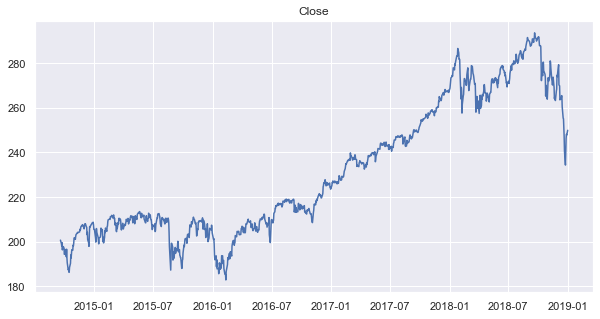

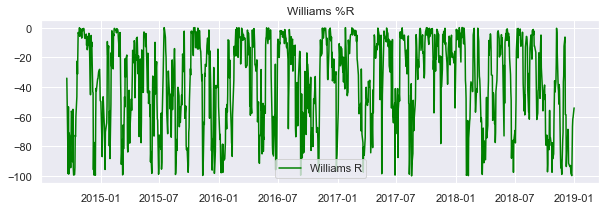

In [496]:
plot(close.loc[wr.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(wr, label='Williams R',c='green')
plt.title('Williams %R')
plt.legend()
plt.show()

In [497]:
corrmat(wr,stoch_k,'WR','STOCH_K')

WR  STOCH_K
WR       1.0      1.0
STOCH_K  1.0      1.0

## Awesome Oscillator (AO)

Awesome Oscillator is a 34-period simple moving average, plotted through the central points of the bars (H+L)/2, and subtracted from the 5-period simple moving average, graphed across the central points of the bars (H+L)/2.

MEDIAN PRICE = (HIGH+LOW)/2

AO = SMA(MEDIAN PRICE, 5)-SMA(MEDIAN PRICE, 34)

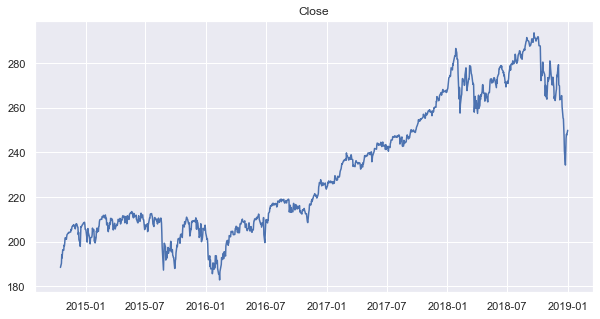

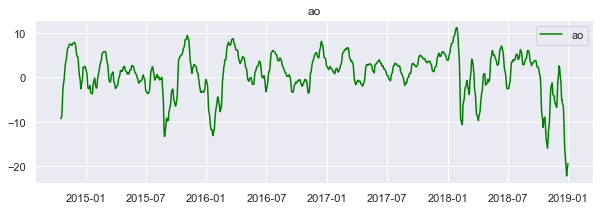

In [498]:
ao = allta.momentum_ao
plot(close.loc[ao.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(ao, label='ao',c='green')
plt.title('ao')
plt.legend()
plt.show()

In [499]:
corrmat(tsi,ao,'tsi','ao')

tsi        ao
tsi  1.000000  0.884932
ao   0.884932  1.000000

## Kaufman's Adaptive Moving Average (KAMA)

Moving average designed to account for market noise or volatility. KAMA will closely follow prices when the price swings are relatively small and the noise is low. KAMA will adjust when the price swings widen and follow prices from a greater distance. This trend-following indicator can be used to identify the overall trend, time turning points and filter price movements.

In [500]:
kama = allta.momentum_kama

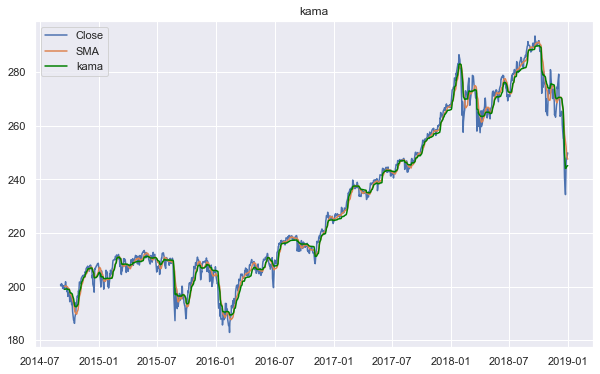

In [501]:
plt.figure(figsize=(10,6))
plt.plot(close,label='Close')
plt.plot(ta.trend.sma_indicator(close,10), label='SMA')
plt.plot(kama, label='kama',c='green')
plt.title('kama')
plt.legend()
plt.show()

## Rate of Change (ROC)

ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100

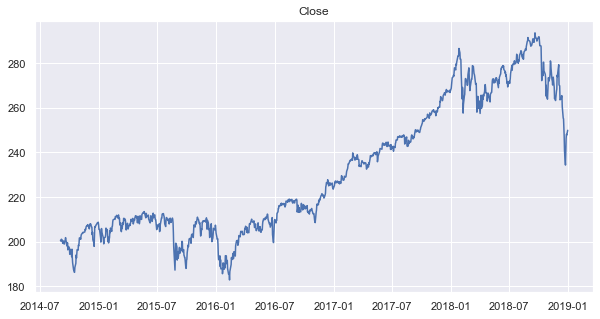

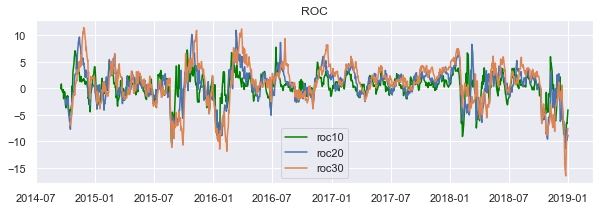

In [502]:
roc_10 = ta.momentum.roc(close,10).rename('roc_10')
roc_20 = ta.momentum.roc(close,20).rename('roc_20')
roc_30 = ta.momentum.roc(close,30).rename('roc_30')


plot(close,figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(roc_10, label='roc10',c='green')
plt.plot(roc_20, label='roc20')
plt.plot(roc_30, label='roc30')
plt.title('ROC')
plt.legend()
plt.show()

## Percentage Price Oscillator (PPO)

Percentage Price Oscillator (PPO): {(12-day EMA - 26-day EMA)/26-day EMA} x 100

Signal Line: 9-day EMA of PPO

PPO Histogram: PPO - Signal Line

In [503]:
ppo = ta.momentum.ppo(close)
ppo_diff = ta.momentum.ppo_hist(close)
ppo_sig = ta.momentum.ppo_signal(close)

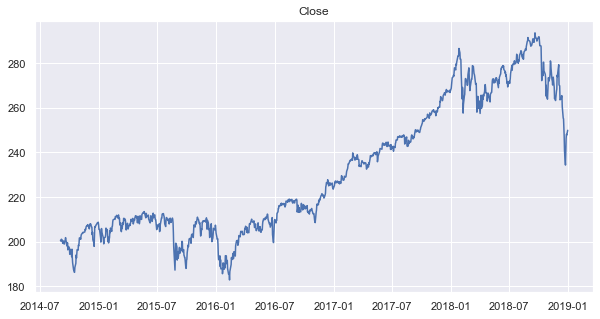

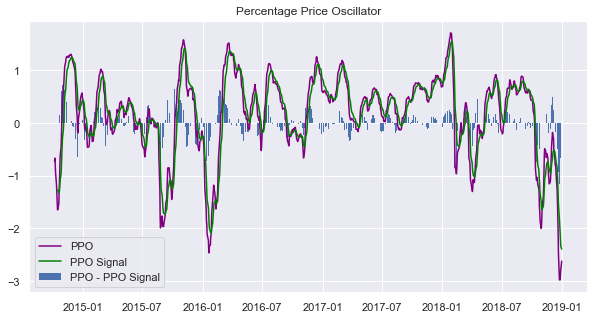

In [504]:
plot(close,figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(ppo, label='PPO',c='purple')
plt.plot(ppo_sig, label='PPO Signal',c='green')
plt.bar(ppo_diff.index, ppo_diff, label='PPO - PPO Signal', linewidth=0)
plt.title('Percentage Price Oscillator')
plt.legend()
plt.show()

looking not so good

## Percentage Volume Oscillator (PVO)

Percentage Volume Oscillator (PVO): 
((12-day EMA of Volume - 26-day EMA of Volume)/26-day EMA of Volume) x 100

Signal Line: 9-day EMA of PVO

PVO Histogram: PVO - Signal Line

In [505]:
pvo = ta.momentum.pvo(volume)
pvo_diff = ta.momentum.pvo_hist(volume)
pvo_sig = ta.momentum.pvo_signal(volume)

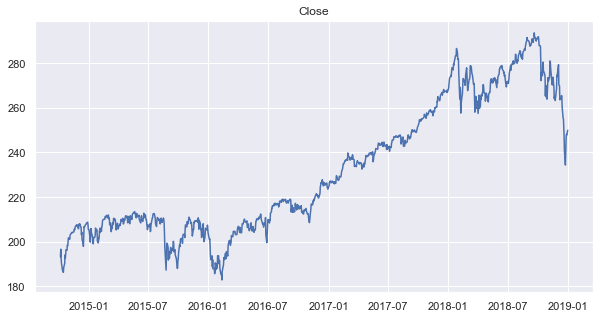

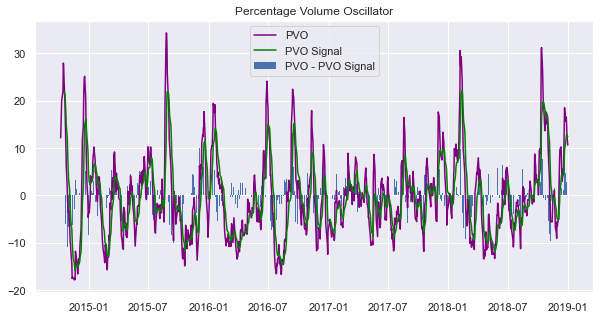

In [506]:
plot(close.loc[pvo.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(pvo, label='PVO',c='purple')
plt.plot(pvo_sig, label='PVO Signal',c='green')
plt.bar(pvo_diff.index, pvo_diff, label='PVO - PVO Signal', linewidth=0)
plt.title('Percentage Volume Oscillator')
plt.legend()
plt.show()

In [507]:
feat = [rsi,stoch_k,stoch_div,ppo_diff,pvo_diff]

In [508]:
ti_momentum = pd.DataFrame(feat).T
ti_momentum

momentum_rsi  momentum_stoch  stoch_diff  PPO_hist_12_26  \
Date                                                                   
2014-09-02           NaN             NaN         NaN             NaN   
2014-09-03           NaN             NaN         NaN             NaN   
2014-09-04           NaN             NaN         NaN             NaN   
2014-09-05           NaN             NaN         NaN             NaN   
2014-09-08           NaN             NaN         NaN             NaN   
...                  ...             ...         ...             ...   
2018-12-24     18.935877        0.157021   -2.838735       -1.153763   
2018-12-26     36.362651       33.155366   21.457471       -0.924613   
2018-12-27     38.630608       38.200747   14.363036       -0.667217   
2018-12-28     38.381198       39.699205    2.680766       -0.459402   
2018-12-31     41.155678       45.856981    4.604669       -0.229188   

            PVO_hist_12_26  
Date                        
2014-09-02             NaN  
2014-09-03             NaN  
2014-09-04             NaN  
2014-09-05             NaN  
2014-09-08             NaN  
...                    ...  
2018-12-24        4.728924  
2018-12-26        4.495644  
2018-12-27        2.787846  
2018-12-28        0.263531  
2018-12-31       -1.778354  

[1091 rows x 5 columns]

# Overall

In [525]:
ret_1 = close.pct_change(1).rename('ret')
ret_3 = close.pct_change(3).rename('ret_3')
ret_5 = close.pct_change(5).rename('ret_5')

In [526]:
volume_diff = volume.pct_change().rename('volume_change')

ti = pd.concat([ti_momentum,ti_trend,ti_volatility,ti_volume], axis=1).dropna()
ti = ti.join([ret_1,ret_3,ret_5,volume_diff])
ti

momentum_rsi  momentum_stoch  stoch_diff  PPO_hist_12_26  \
Date                                                                   
2014-10-17     35.353306       39.987790    8.678561       -0.364742   
2014-10-20     41.046956       53.443878   13.447730       -0.208974   
2014-10-21     50.683321       77.487245   20.514274        0.037577   
2014-10-22     47.615183       68.686224    2.147109        0.156180   
2014-10-23     52.628035       82.971939    6.590136        0.308510   
...                  ...             ...         ...             ...   
2018-12-24     18.935877        0.157021   -2.838735       -1.153763   
2018-12-26     36.362651       33.155366   21.457471       -0.924613   
2018-12-27     38.630608       38.200747   14.363036       -0.667217   
2018-12-28     38.381198       39.699205    2.680766       -0.459402   
2018-12-31     41.155678       45.856981    4.604669       -0.229188   

            PVO_hist_12_26  trend_macd_diff  trend_vortex_ind_diff  \
Date                                                                 
2014-10-17        3.044345        -0.689646              -0.351221   
2014-10-20       -1.951506        -0.387910              -0.342460   
2014-10-21       -4.454781         0.085727              -0.146531   
2014-10-22       -6.098113         0.313424              -0.042601   
2014-10-23       -6.890691         0.605338              -0.074687   
...                    ...              ...                    ...   
2018-12-24        4.728924        -2.948222              -0.855176   
2018-12-26        4.495644        -2.336859              -0.688918   
2018-12-27        2.787846        -1.661229              -0.444730   
2018-12-28        0.263531        -1.117986              -0.367385   
2018-12-31       -1.778354        -0.524744              -0.276900   

             trend_cci  trend_dpo  trend_kst_diff  ...  bbipband     std_10  \
Date                                               ...                        
2014-10-17  -99.347355     0.5540        0.820280  ...  0.192384   3.940827   
2014-10-20  -69.950503     3.1365        1.326684  ...  0.318079   3.392761   
2014-10-21    1.048855     3.1035        4.715202  ...  0.553776   3.488202   
2014-10-22    9.804666     0.4170        6.657357  ...  0.490035   2.819467   
2014-10-23   47.952393     3.8675       10.830108  ...  0.642460   3.150709   
...                ...        ...             ...  ...       ...        ...   
2018-12-24 -206.022183     1.2460      -25.043317  ... -0.105606  10.675105   
2018-12-26 -135.758745     2.8120      -26.442115  ...  0.185881  10.271680   
2018-12-27  -98.963991     3.8885      -26.105998  ...  0.250817   9.179889   
2018-12-28  -68.335167     6.5600      -26.185191  ...  0.268384   7.530002   
2018-12-31  -57.492335     7.6730      -23.998171  ...  0.333316   6.331802   

            Money Flow Volume      eom_1     mfi_14          fi_1       ret  \
Date                                                                          
2014-10-17      -4.332704e+07   3.423959  37.289733  4.721640e+08  0.011811   
2014-10-20       1.136222e+08   1.052611  37.140601  2.379183e+08  0.009710   
2014-10-21       1.401386e+08   6.284350  43.196770  5.841615e+08  0.019811   
2014-10-22      -1.412586e+08   1.393756  48.912904 -2.095116e+08 -0.007111   
2014-10-23      -4.791959e+07   1.840583  49.529781  3.470656e+08  0.011625   
...                       ...        ...        ...           ...       ...   
2018-12-24      -1.441710e+08 -32.513271   9.863313 -9.368916e+08 -0.026423   
2018-12-26       2.184900e+08  13.727997  18.674785  2.586922e+09  0.050525   
2018-12-27       1.774856e+08  18.307376  26.745387  3.520503e+08  0.007677   
2018-12-28      -7.268384e+07  17.135859  33.505456 -4.899200e+07 -0.001290   
2018-12-31       1.156522e+08  -0.179071  39.949494  3.131310e+08  0.008759   

               ret_3     ret_5  volume_change  
Date                                           
2014-10-17  

In [527]:
from sklearn.preprocessing import MinMaxScaler

In [528]:
def minmaxscaler(x):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index = x.index)

In [529]:
features = minmaxscaler(ti)

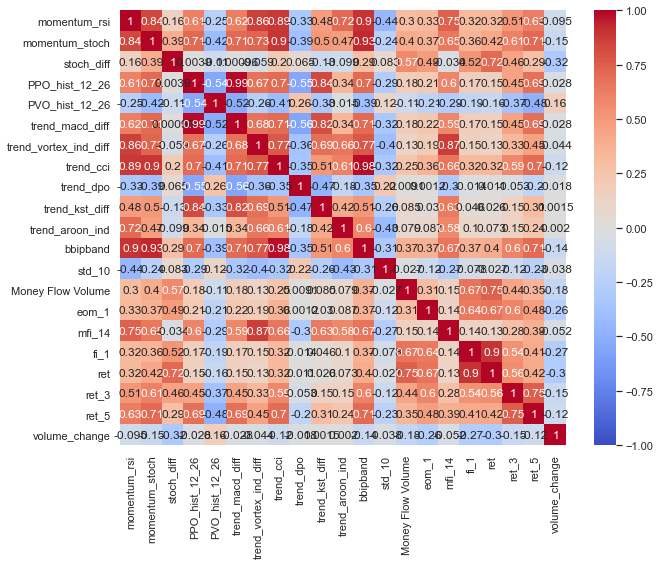

In [530]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

In [531]:
# drop highly (+80) correlated features

features = features.drop(columns=['momentum_stoch','bbipband','trend_cci','trend_vortex_ind_diff','PPO_hist_12_26','trend_kst_diff'])

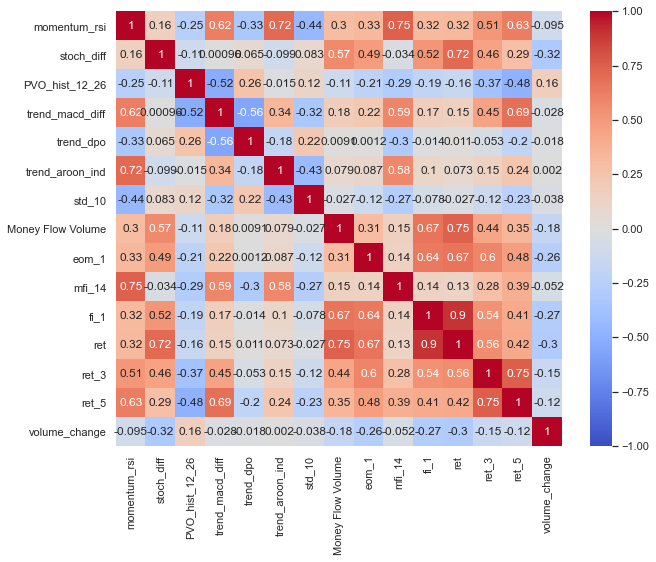

In [532]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

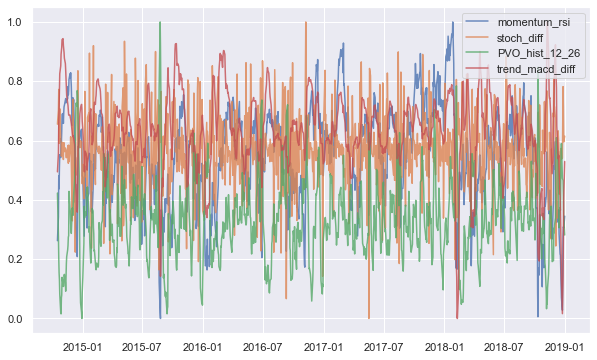

In [533]:
plt.figure(figsize=(10,6))
plt.plot(features.iloc[:,:4], alpha=0.8)
plt.legend(features.iloc[:,:4])
plt.show()

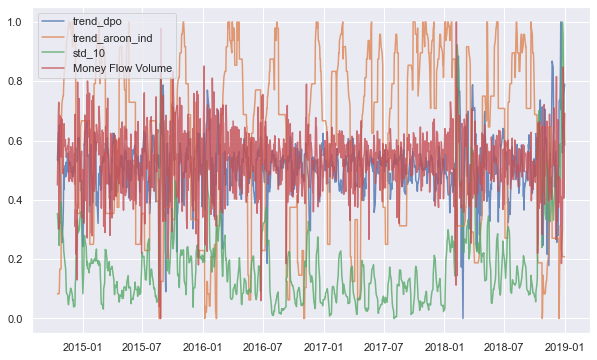

In [534]:
plt.figure(figsize=(10,6))
plt.plot(features.iloc[:,4:8], alpha=0.8)
plt.legend(features.iloc[:,4:8])
plt.show()

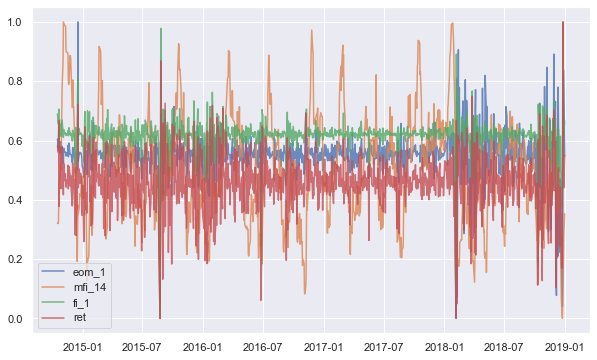

In [535]:
plt.figure(figsize=(10,6))
plt.plot(features.iloc[:,8:12], alpha=0.8)
plt.legend(features.iloc[:,8:12])
plt.show()

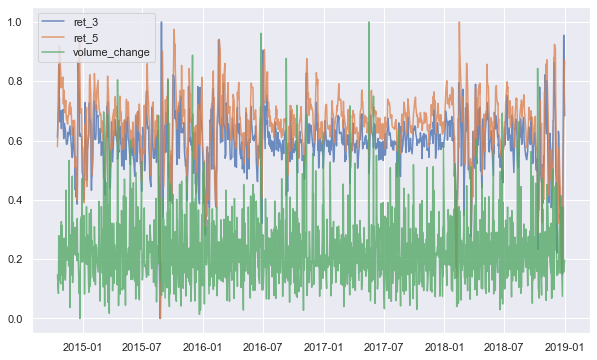

In [536]:
plt.figure(figsize=(10,6))
plt.plot(features.iloc[:,12:], alpha=0.8)
plt.legend(features.iloc[:,12:])
plt.show()

## PCA Analysis

In [550]:
from sklearn.decomposition import PCA

In [558]:
pca = PCA(4)
X_pc = pca.fit_transform(features)

In [559]:
components_ = pca.components_
n_components_ = pca.n_components_
explained_variance_ratio_ = pca.explained_variance_ratio_

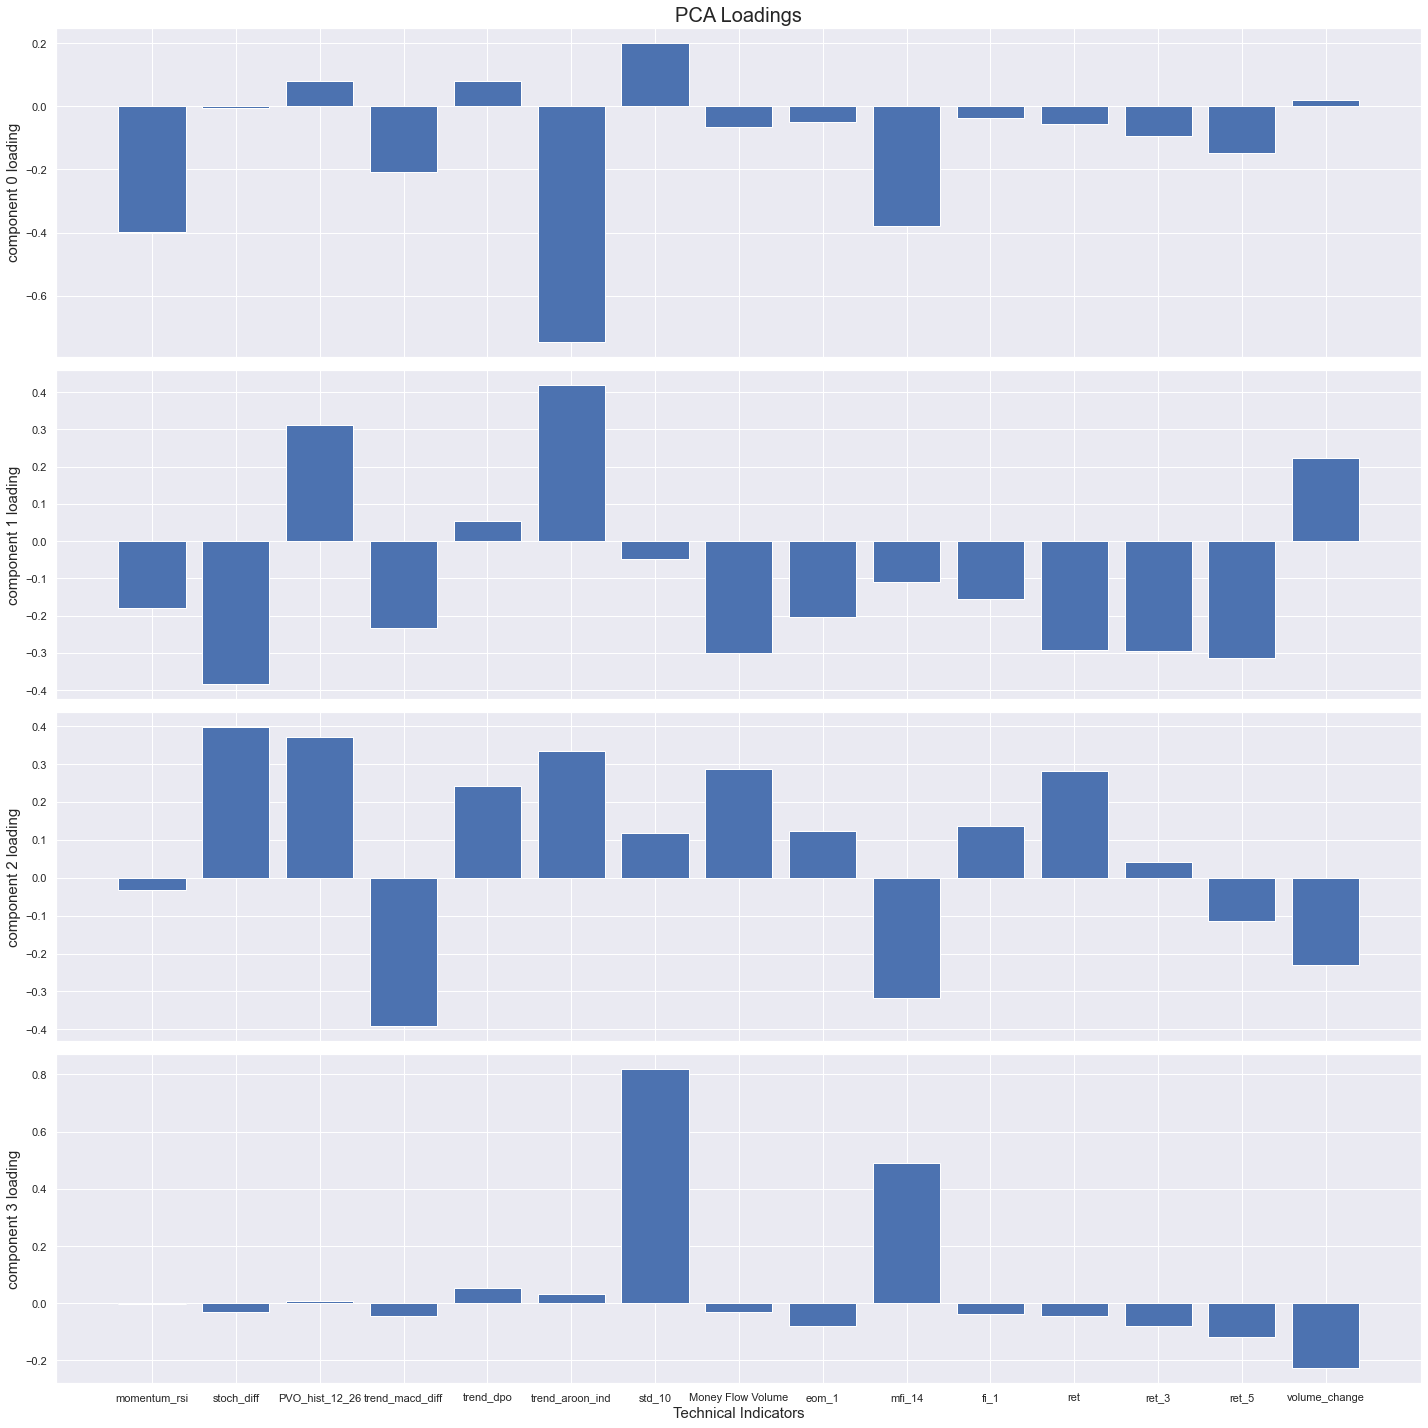

In [560]:
n_loadings = n_components_
fig, axs = plt.subplots(n_loadings, 1, sharex=True, figsize=(20, 20))
for i in range(n_loadings):
        axs[i].bar([i for i in features.columns],
                    components_[i])
        axs[i].set_ylabel('component '+str(i)+' loading',
                            fontsize=15)
axs[0].set_title('PCA Loadings', fontsize=20)
axs[i].set_xlabel('Technical Indicators', fontsize=15)

fig.tight_layout()

In [561]:
print(features.columns)

Index(['momentum_rsi', 'stoch_diff', 'PVO_hist_12_26', 'trend_macd_diff',
       'trend_dpo', 'trend_aroon_ind', 'std_10', 'Money Flow Volume', 'eom_1',
       'mfi_14', 'fi_1', 'ret', 'ret_3', 'ret_5', 'volume_change'],
      dtype='object')
